<div style="background-color: #800080; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">Welcome to my notebook</h1>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/food-choices/food_coded.csv
/kaggle/input/food-choices/codebook_food.docx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Data inspection
</div>

In [3]:
df=pd.read_csv('/kaggle/input/food-choices/food_coded.csv')
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [5]:
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


<div style="background-color: #ffff00; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 20px;">
               Observation<br><br>
        1.The dataset comprises 125 entries with 61 columns, containing various data types, including integers, floats, and objects (strings).<br>
        2.Many columns have missing values, with the number of non-null entries ranging from 99 to 125.<br>
        3.The 'Gender' column is binary, with values of 1 and 2, while other columns, such as 'GPA' and 'weight,' are stored as objects but should be numerical.<br>
        4.Descriptive statistics show a wide range of values across the columns, indicating diverse data points.
    </h1>
</div>


<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Data cleaning
</div>


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 15px;"> Handling missing data </h1>
</div>

<div style="background-color: #008000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px; color: white;">Handling Missing Values</h1>
    <p style="color: white; font-size: 18px;">
        <b>Methods for Handling Missing Values</b>
        <br><br>
        <b>1.Complete Case Analysis (CCA):</b>
        <br>
        In complete case analysis, also known as listwise deletion, you simply remove any observations from your dataset that contain missing values in any of the columns. 
        This method is straightforward and easy to implement. However, it can lead to loss of valuable information, especially if the missing values are not missing completely at random (MCAR).
        <br><br>
        <b>2.Pairwise Deletion:</b>
        <br>
        With pairwise deletion, also known as available case analysis, you retain observations with missing values for specific analyses but only use the available data for each calculation. 
        This method allows you to maximize the use of available data without discarding entire observations. However, it can lead to biased estimates if missingness is related to the variables being analyzed.
        <br><br>
        <b>3.Threshold-based Removal:</b>
        <br>
        In threshold-based removal, you set a threshold for the proportion of missing values allowed in each observation or column. Observations or columns exceeding this threshold are removed from the dataset. 
        This method allows you to control the extent of data loss by adjusting the threshold. However, choosing an appropriate threshold can be subjective and may require domain knowledge or sensitivity analysis.
        <br><br>
        <b>4.Column-wise Removal:</b>
        <br>
        If certain columns in your dataset have a high proportion of missing values and are not critical for your analysis, you may choose to remove those columns entirely. 
        This method can help reduce the complexity of your dataset and focus your analysis on the most informative variables. However, it may result in the loss of potentially relevant information, so it's essential to carefully evaluate the importance of each column.
        <br><br>
        <b>5.Row-wise Removal:</b>
        <br>
        Similarly, if certain observations have missing values across multiple columns and cannot be imputed accurately, you may choose to remove those observations entirely. 
        This method can help ensure the quality of your dataset by eliminating potentially unreliable or biased observations. However, it may reduce the sample size and statistical power of your analysis, particularly if missingness is non-random.
        <br><br>
        <b>6.Imputation before Removal:</b>
        <br>
        Before removing missing values, you may consider imputing missing values for certain columns to retain as much information as possible. 
        After imputation, you can then apply one of the aforementioned methods to remove remaining missing values or observations. This approach allows you to balance the trade-off between data completeness and bias reduction.
    </p>
</div>



<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Here dataset size is small (125 rows), and considering the potential loss of valuable information, we can use the following approaches:</h1>
    <p style="text-align: left; font-size: 18px;">1. <strong>Imputation before removal</strong>: Since you have a small dataset, imputing missing values before removing them might be beneficial. You can use appropriate imputation methods (e.g., mean, median, mode imputation for numerical or categorical variables) to fill in missing values, thereby retaining as much information as possible.</p>
    <p style="text-align: left; font-size: 18px;">2. <strong>Threshold-based Removal</strong>: Considering the small number of observations, you might set a relatively lenient threshold for removing observations or columns with missing values. This approach allows you to control the extent of data loss while ensuring that the remaining dataset is relatively complete.</p>
    <p style="text-align: left; font-size: 18px;">Combining these approaches can help mitigate the loss of information while still addressing the issue of missing values. Here's how you might proceed:</p>
    <ul style="text-align: left; font-size: 18px;">
        <li><strong>Impute missing values</strong>: Use imputation methods to fill in missing values in your dataset.</li>
        <li><strong>Threshold-based removal</strong>: After imputation, apply a threshold-based approach to remove any remaining observations or columns with a high proportion of missing values.</li>
    </ul>
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Accesing numeric feature </h1>
</div>

In [8]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns]

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
0,2,1,430,NaN,315.0,1,9.0,2.0,9,NaN,...,5.0,3.0,1.0,1.0,1,1165.0,345,5,1,1315
1,1,1,610,3.0,420.0,2,1.0,3.0,1,1.0,...,4.0,3.0,1.0,1.0,2,725.0,690,4,2,900
2,1,1,720,4.0,420.0,2,1.0,1.0,1,3.0,...,5.0,6.0,1.0,2.0,5,1165.0,500,5,1,900
3,1,1,430,3.0,420.0,2,2.0,2.0,2,2.0,...,5.0,5.0,1.0,2.0,5,725.0,690,3,1,1315
4,1,1,720,2.0,420.0,2,1.0,1.0,1,2.0,...,2.0,4.0,1.0,1.0,4,940.0,500,4,2,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,1,610,4.0,420.0,2,NaN,3.0,2,1.0,...,3.0,4.0,1.0,1.0,5,940.0,500,5,1,1315
121,1,1,265,2.0,315.0,2,NaN,3.0,3,NaN,...,1.0,4.0,1.0,NaN,4,940.0,500,5,2,1315
122,1,1,720,NaN,420.0,1,NaN,3.0,3,NaN,...,5.0,4.0,1.0,2.0,5,580.0,690,4,2,1315
123,2,1,720,4.0,420.0,1,NaN,3.0,7,1.0,...,1.0,2.0,2.0,2.0,1,940.0,500,3,1,1315


## Filling missing data with mean value

In [9]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    column_mean = df[column].mean()
    df[column].fillna(column_mean, inplace=True)
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.028302,315.0,1,none,we dont have comfort,9.000000,...,1.0,1.000000,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.000000,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.000000,...,1.0,1.000000,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.000000,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.000000,...,1.0,2.000000,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.000000,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.000000,...,1.0,2.000000,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.000000,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.000000,...,1.0,1.000000,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.000000,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,2.698113,...,1.0,1.000000,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.000000,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,2.698113,...,1.0,1.390244,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,3.028302,420.0,1,"rice, potato, seaweed soup",sadness,2.698113,...,1.0,2.000000,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.000000,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",2.698113,...,2.0,2.000000,1,940.0,500,NaN,3,1,1315,135


In [10]:
df['type_sports'].unique()
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [11]:
df['type_sports'].value_counts()

type_sports
none                                        8
Hockey                                      7
softball                                    4
Soccer                                      4
Softball                                    3
                                           ..
Ice Hockey                                  1
rowing                                      1
tennis                                      1
Recreational Basketball, Equestrian Team    1
basketball                                  1
Name: count, Length: 66, dtype: int64

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Accesing object type feature </h1>
</div>

In [12]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,GPA,comfort_food,comfort_food_reasons,diet_current,eating_changes,father_profession,fav_cuisine,food_childhood,healthy_meal,ideal_diet,meals_dinner_friend,mother_profession,type_sports,weight
0,2.4,none,we dont have comfort,eat good and exercise,eat faster,profesor,Arabic cuisine,rice and chicken,looks not oily,being healthy,"rice, chicken, soup",unemployed,car racing,187
1,3.654,"chocolate, chips, ice cream","Stress, bored, anger",I eat about three times a day with some snacks...,I eat out more than usual.,Self employed,Italian,"chicken and biscuits, beef soup, baked beans","Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,"Pasta, steak, chicken",Nurse RN,Basketball,155
2,3.3,"frozen yogurt, pizza, fast food","stress, sadness","toast and fruit for breakfast, salad for lunch...",sometimes choosing to eat fast food instead of...,owns business,italian,"mac and cheese, pizza, tacos",usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,"chicken and rice with veggies, pasta, some kin...",owns business,none,I'm not answering this.
3,3.2,"Pizza, Mac and cheese, ice cream",Boredom,"College diet, cheap and easy foods most nights...",Accepting cheap and premade/store bought foods,Mechanic,Turkish,"Beef stroganoff, tacos, pizza","Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",Grilled chicken \rStuffed Shells\rHomemade Chili,Special Education Teacher,NaN,"Not sure, 240"
4,3.5,"Ice cream, chocolate, chips","Stress, boredom, cravings",I try to eat healthy but often struggle becaus...,I have eaten generally the same foods but I do...,IT,Italian,"Pasta, chicken tender, pizza","A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",Substance Abuse Conselor,Softball,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,"wine. mac and cheese, pizza, ice cream",boredom and sadness,"My diet consists mainly of coffee, water, frui...",I have noticed there is less time for a prepar...,Accountant,Italian,Stromboli Mac and Cheese and Pizza,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,"pasta, fish, steak",Radiological Technician,Softball,156
121,3,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,A college student with an imbalanced diet tryi...,Eating Pizza as an excuse when there is nothin...,Doctor,Mexican Food,"Isombe , Plantains and Ugali","A healthy meal is a variety of food , organic ...",Eating home cooked meals everyday and being ab...,Fried Rice \rBaked potatoes \rCurry Chicken,Public Health Advisor,basketball,180
122,3.882,"rice, potato, seaweed soup",sadness,"Rice, oatmeal, and tea",less rice,CEO of company,Korean,Rice and potato,lots of vegetables,lots of veggies,"meat, rice, kimchi",Real Estate manageer,none,120
123,3,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",I try to eat as healthy as possible everyday. ...,I don't eat as much on a daily basis since com...,Store manager at Giant Eagle,Italian,pizza and spaghetti,"A protein, a fruit, a starch, and a salad or s...",My ideal diet is the diet i am currently on. ...,"Pizza, Spaghetti, Baked Ziti",Receptionist for a medical supply company,NaN,135


In [13]:
df['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [14]:
# Step 1: Convert non-numeric values to NaN
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
# Step 2: Calculate the mean value
mean_GPA = df['GPA'].mean()
# Step 3: Replace NaN values with the mean value
df['GPA'].fillna(mean_GPA, inplace=True)
# Print the unique values to verify the changes
df['GPA'].unique()


array([2.4       , 3.654     , 3.3       , 3.2       , 3.5       ,
       2.25      , 3.8       , 3.904     , 3.4       , 3.6       ,
       3.1       , 3.41555833, 4.        , 2.2       , 3.87      ,
       3.7       , 3.9       , 2.8       , 3.        , 3.65      ,
       3.89      , 2.9       , 3.605     , 3.83      , 3.292     ,
       3.35      , 2.6       , 3.67      , 3.73      , 2.71      ,
       3.68      , 3.75      , 3.92      , 3.77      , 3.63      ,
       3.882     ])

In [15]:
df['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

In [16]:
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
mean_weight = df['weight'].mean()
df['weight'].fillna(mean_weight, inplace=True)
df['weight'].unique()

array([187. , 155. , 158.5, 190. , 180. , 137. , 125. , 116. , 110. ,
       264. , 123. , 185. , 145. , 170. , 135. , 165. , 175. , 195. ,
       105. , 160. , 167. , 115. , 205. , 128. , 150. , 140. , 120. ,
       100. , 113. , 168. , 169. , 200. , 265. , 192. , 118. , 210. ,
       112. , 130. , 127. , 129. , 260. , 184. , 230. , 138. , 156. ])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [18]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,comfort_food,comfort_food_reasons,diet_current,eating_changes,father_profession,fav_cuisine,food_childhood,healthy_meal,ideal_diet,meals_dinner_friend,mother_profession,type_sports
0,none,we dont have comfort,eat good and exercise,eat faster,profesor,Arabic cuisine,rice and chicken,looks not oily,being healthy,"rice, chicken, soup",unemployed,car racing
1,"chocolate, chips, ice cream","Stress, bored, anger",I eat about three times a day with some snacks...,I eat out more than usual.,Self employed,Italian,"chicken and biscuits, beef soup, baked beans","Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,"Pasta, steak, chicken",Nurse RN,Basketball
2,"frozen yogurt, pizza, fast food","stress, sadness","toast and fruit for breakfast, salad for lunch...",sometimes choosing to eat fast food instead of...,owns business,italian,"mac and cheese, pizza, tacos",usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,"chicken and rice with veggies, pasta, some kin...",owns business,none
3,"Pizza, Mac and cheese, ice cream",Boredom,"College diet, cheap and easy foods most nights...",Accepting cheap and premade/store bought foods,Mechanic,Turkish,"Beef stroganoff, tacos, pizza","Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",Grilled chicken \rStuffed Shells\rHomemade Chili,Special Education Teacher,NaN
4,"Ice cream, chocolate, chips","Stress, boredom, cravings",I try to eat healthy but often struggle becaus...,I have eaten generally the same foods but I do...,IT,Italian,"Pasta, chicken tender, pizza","A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",Substance Abuse Conselor,Softball
...,...,...,...,...,...,...,...,...,...,...,...,...
120,"wine. mac and cheese, pizza, ice cream",boredom and sadness,"My diet consists mainly of coffee, water, frui...",I have noticed there is less time for a prepar...,Accountant,Italian,Stromboli Mac and Cheese and Pizza,mainly protein and vegetables with a complex c...,My ideal diet would consist of a majority of w...,"pasta, fish, steak",Radiological Technician,Softball
121,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,A college student with an imbalanced diet tryi...,Eating Pizza as an excuse when there is nothin...,Doctor,Mexican Food,"Isombe , Plantains and Ugali","A healthy meal is a variety of food , organic ...",Eating home cooked meals everyday and being ab...,Fried Rice \rBaked potatoes \rCurry Chicken,Public Health Advisor,basketball
122,"rice, potato, seaweed soup",sadness,"Rice, oatmeal, and tea",less rice,CEO of company,Korean,Rice and potato,lots of vegetables,lots of veggies,"meat, rice, kimchi",Real Estate manageer,none
123,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",I try to eat as healthy as possible everyday. ...,I don't eat as much on a daily basis since com...,Store manager at Giant Eagle,Italian,pizza and spaghetti,"A protein, a fruit, a starch, and a salad or s...",My ideal diet is the diet i am currently on. ...,"Pizza, Spaghetti, Baked Ziti",Receptionist for a medical supply company,NaN


In [19]:
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    unique_values_count = df[column].nunique()
    print(f"Column '{column}' has {unique_values_count} unique values.")


Column 'comfort_food' has 124 unique values.
Column 'comfort_food_reasons' has 106 unique values.
Column 'diet_current' has 124 unique values.
Column 'eating_changes' has 121 unique values.
Column 'father_profession' has 114 unique values.
Column 'fav_cuisine' has 60 unique values.
Column 'food_childhood' has 114 unique values.
Column 'healthy_meal' has 124 unique values.
Column 'ideal_diet' has 124 unique values.
Column 'meals_dinner_friend' has 121 unique values.
Column 'mother_profession' has 112 unique values.
Column 'type_sports' has 66 unique values.


In [20]:
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts().sort_values(ascending=False))
    print()

Value counts for column 'comfort_food':
comfort_food
none                                            1
cookies, donuts, candy bars                     1
frozen yogurt, pizza, fast food                 1
Pizza, Mac and cheese, ice cream                1
Ice cream, chocolate, chips                     1
                                               ..
Pizza / Wings / Cheesecake                      1
rice, potato, seaweed soup                      1
Mac n Cheese, Lasagna, Pizza                    1
Ice cream, cake, pop, pizza, and milkshakes.    1
Chocolates, pizza, and Ritz.                    1
Name: count, Length: 124, dtype: int64

Value counts for column 'comfort_food_reasons':
comfort_food_reasons
boredom                                                                               7
sadness                                                                               3
Boredom                                                                               3
Boredom                 

### 'fav_cuisine' has unique value with good frequency so encoded 

In [21]:
cuisine_mapping_numeric = {
    'Italian': 1,
    'Mexican': 2,
    'American': 3,
}
# Encode the 'fav_cuisine' column with numerical values
df['fav_cuisine_encoded'] = df['fav_cuisine'].map(cuisine_mapping_numeric).fillna(0)
# Display the DataFrame with the new encoded column
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,fav_cuisine_encoded
0,2.400,2,1,430,3.028302,315.0,1,none,we dont have comfort,9.000000,...,1.000000,1,1165.0,345,car racing,5,1,1315,187.0,0.0
1,3.654,1,1,610,3.000000,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.000000,...,1.000000,2,725.0,690,Basketball,4,2,900,155.0,1.0
2,3.300,1,1,720,4.000000,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.000000,...,2.000000,5,1165.0,500,none,5,1,900,158.5,0.0
3,3.200,1,1,430,3.000000,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.000000,...,2.000000,5,725.0,690,NaN,3,1,1315,158.5,0.0
4,3.500,1,1,720,2.000000,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.000000,...,1.000000,4,940.0,500,Softball,4,2,760,190.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.000000,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,2.698113,...,1.000000,5,940.0,500,Softball,5,1,1315,156.0,0.0
121,3.000,1,1,265,2.000000,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,2.698113,...,1.390244,4,940.0,500,basketball,5,2,1315,180.0,0.0
122,3.882,1,1,720,3.028302,420.0,1,"rice, potato, seaweed soup",sadness,2.698113,...,2.000000,5,580.0,690,none,4,2,1315,120.0,0.0
123,3.000,2,1,720,4.000000,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",2.698113,...,2.000000,1,940.0,500,NaN,3,1,1315,135.0,1.0


In [22]:
df['fav_cuisine_encoded']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    1.0
124    0.0
Name: fav_cuisine_encoded, Length: 125, dtype: float64

In [23]:
numeric_columns = []
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_columns.append(column)
cleaned_df=df[numeric_columns]


<div style="background-color: #ff0000; padding: 22px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> Final Numeric dataframe </h1>
</div>

In [24]:
cleaned_df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight,fav_cuisine_encoded
0,2.400,2,1,430,3.028302,315.0,1,9.000000,2.000000,9,...,1.0,1.000000,1,1165.0,345,5,1,1315,187.0,0.0
1,3.654,1,1,610,3.000000,420.0,2,1.000000,3.000000,1,...,1.0,1.000000,2,725.0,690,4,2,900,155.0,1.0
2,3.300,1,1,720,4.000000,420.0,2,1.000000,1.000000,1,...,1.0,2.000000,5,1165.0,500,5,1,900,158.5,0.0
3,3.200,1,1,430,3.000000,420.0,2,2.000000,2.000000,2,...,1.0,2.000000,5,725.0,690,3,1,1315,158.5,0.0
4,3.500,1,1,720,2.000000,420.0,2,1.000000,1.000000,1,...,1.0,1.000000,4,940.0,500,4,2,760,190.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.000000,420.0,2,2.698113,3.000000,2,...,1.0,1.000000,5,940.0,500,5,1,1315,156.0,0.0
121,3.000,1,1,265,2.000000,315.0,2,2.698113,3.000000,3,...,1.0,1.390244,4,940.0,500,5,2,1315,180.0,0.0
122,3.882,1,1,720,3.028302,420.0,1,2.698113,3.000000,3,...,1.0,2.000000,5,580.0,690,4,2,1315,120.0,0.0
123,3.000,2,1,720,4.000000,420.0,1,2.698113,3.000000,7,...,2.0,2.000000,1,940.0,500,3,1,1315,135.0,1.0


In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food_reasons_coded    125 non-null    float64
 8   cook                          125 non-null    float64
 9   comfort_food_reasons_coded.1  125 non-null    int64  
 10  cuisine                       125 non-null    float64
 11  diet_current_coded            125 non-null    int64  
 12  drink                         125 non-null    float64
 13  eatin

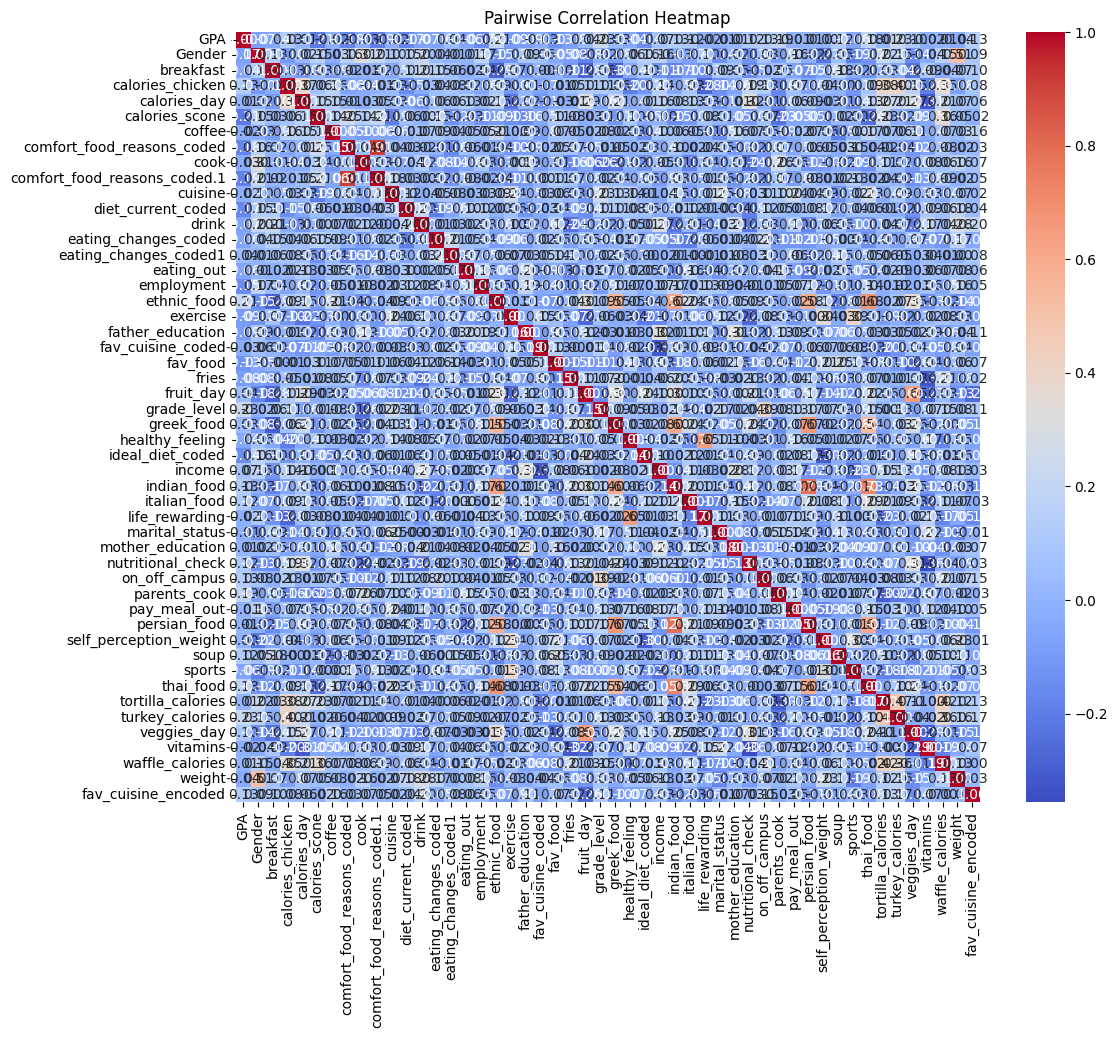

In [26]:
# Pairwise correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()



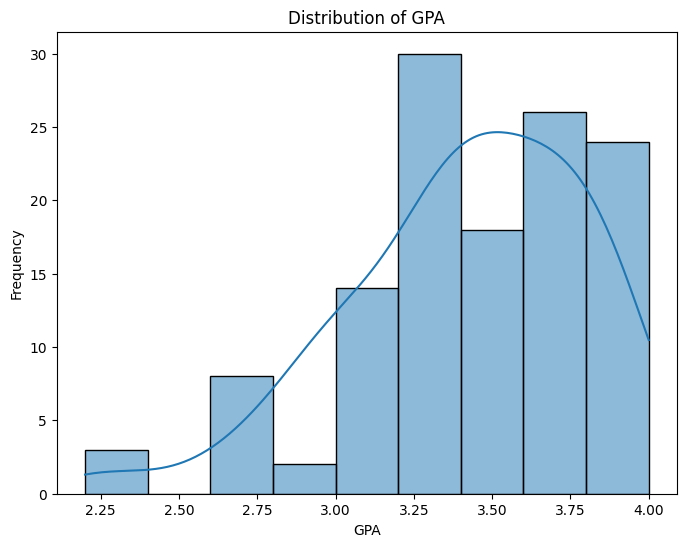

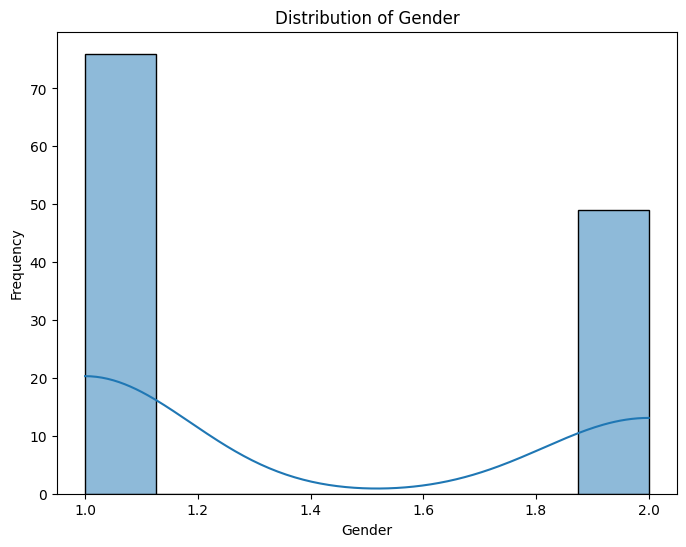

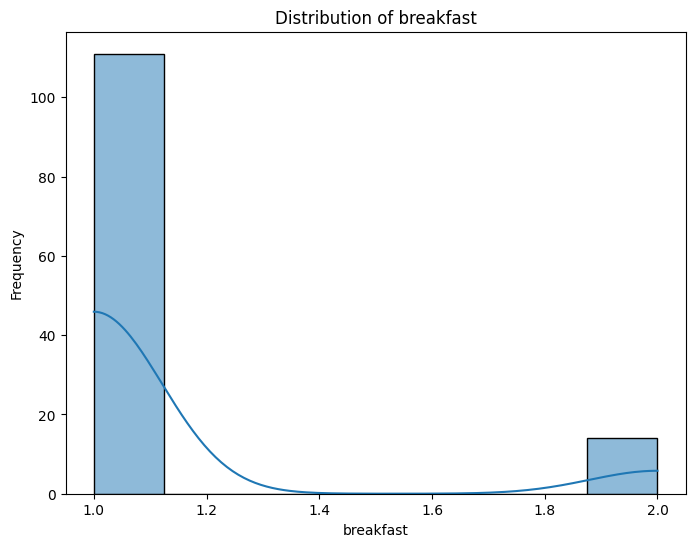

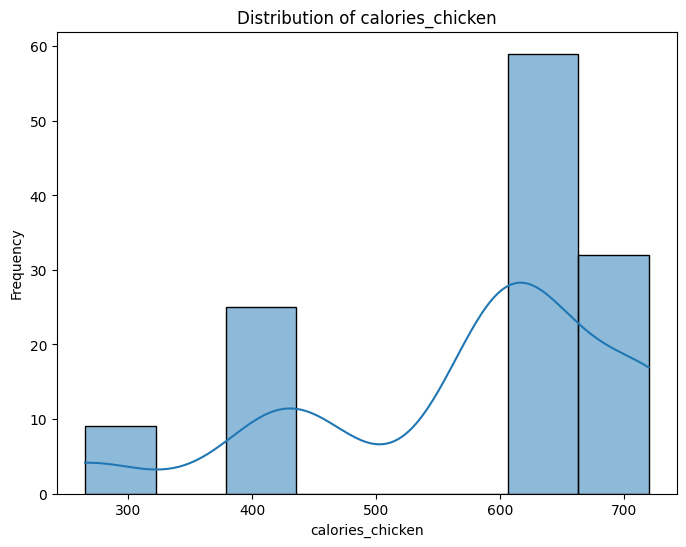

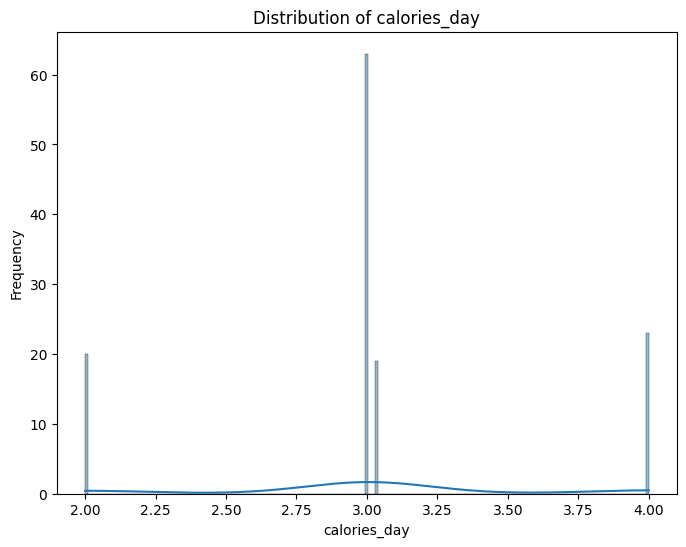

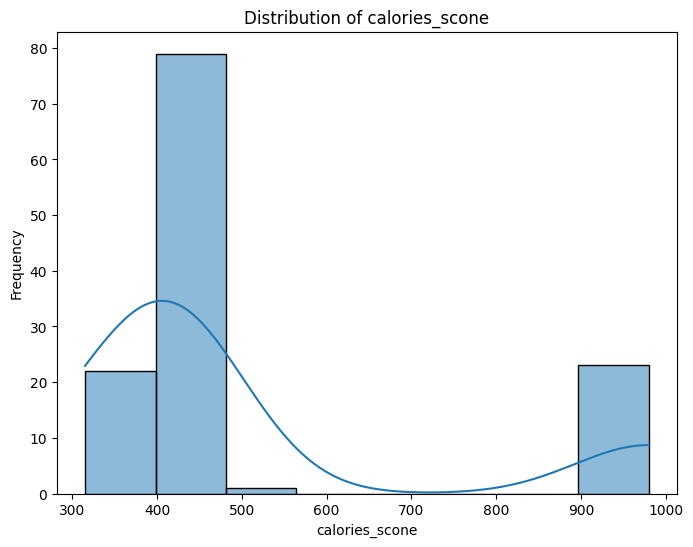

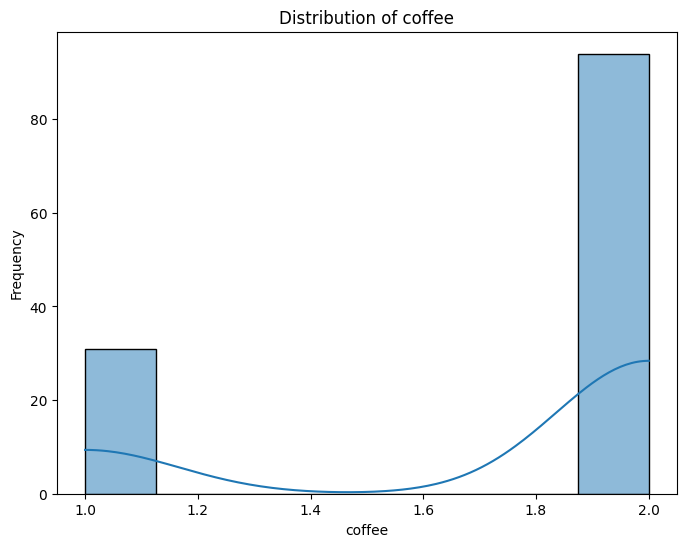

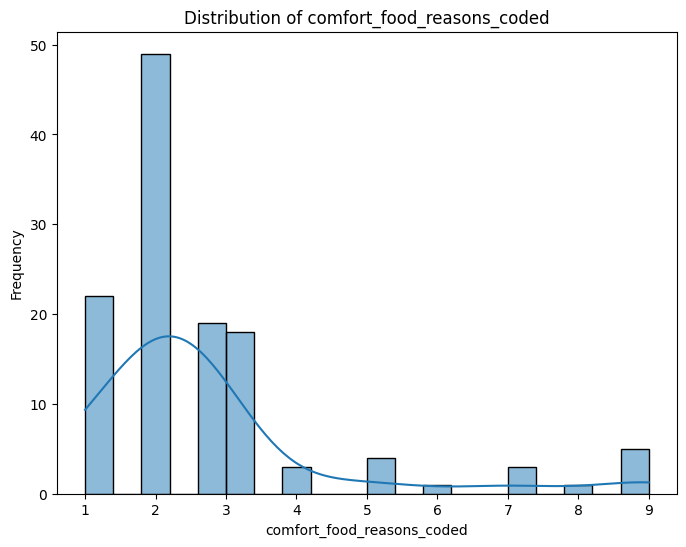

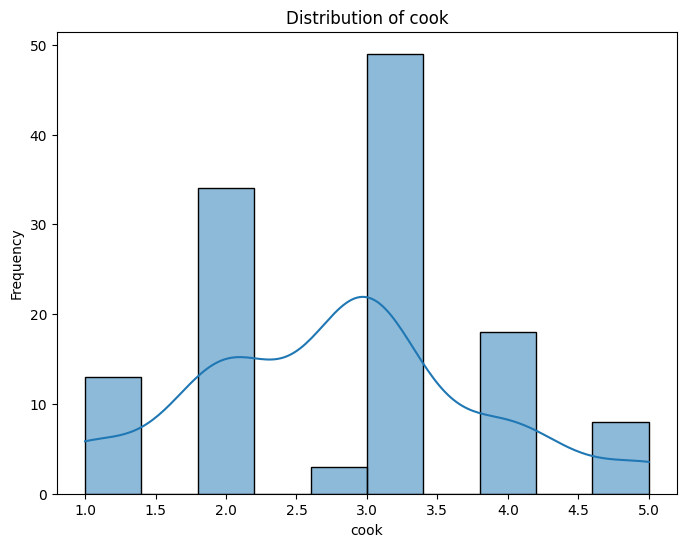

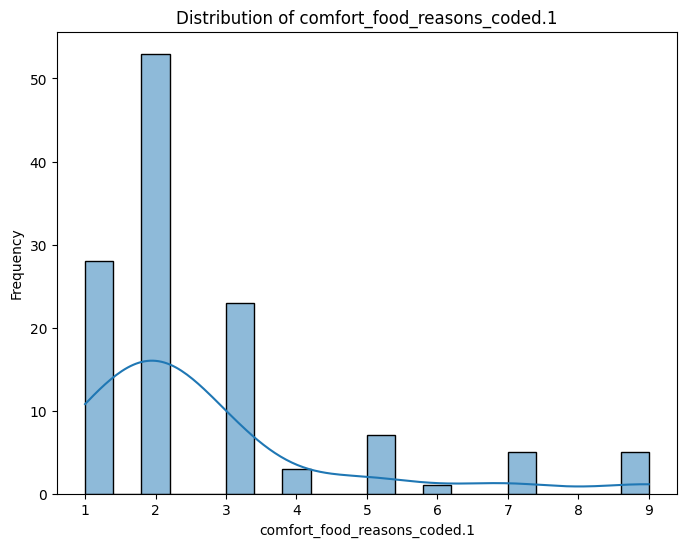

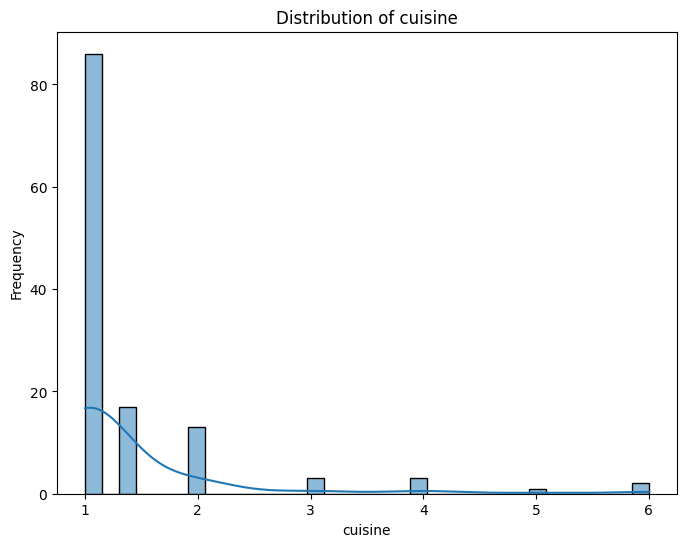

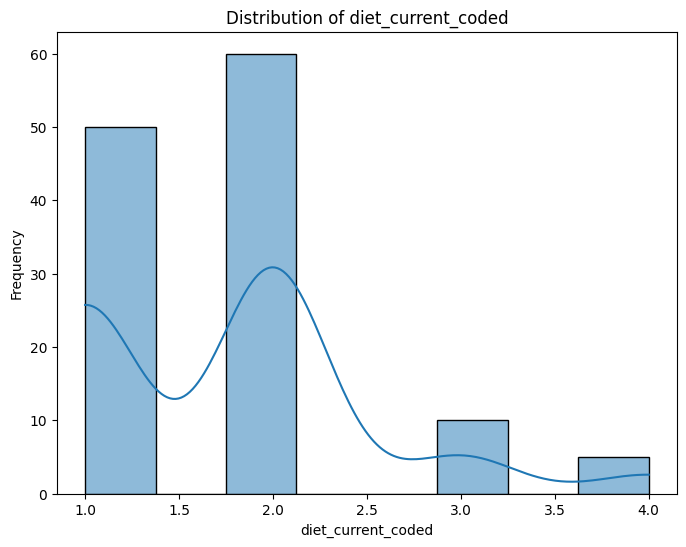

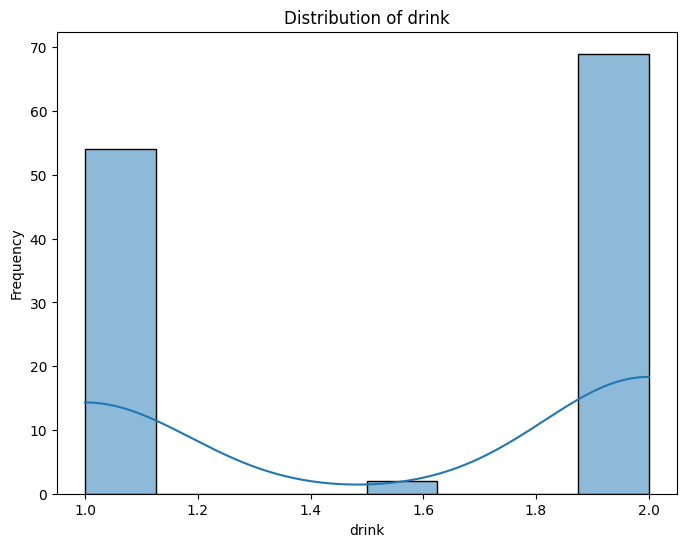

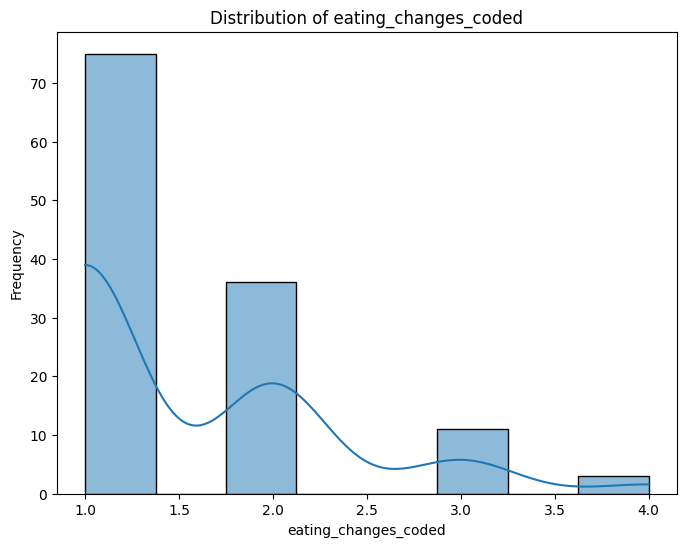

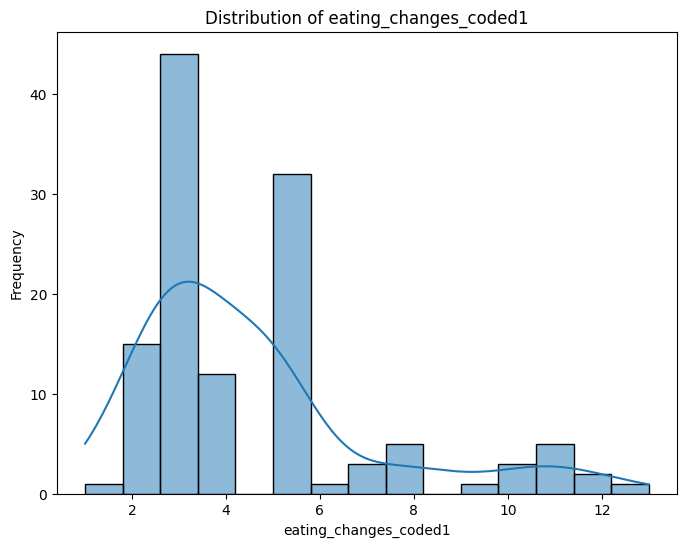

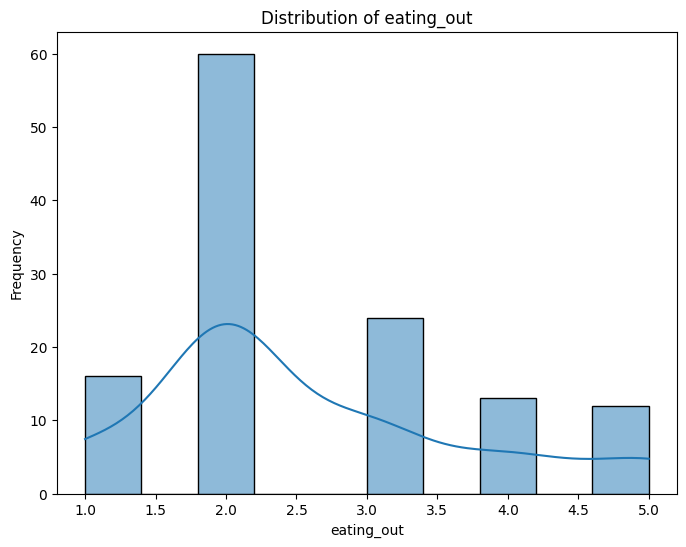

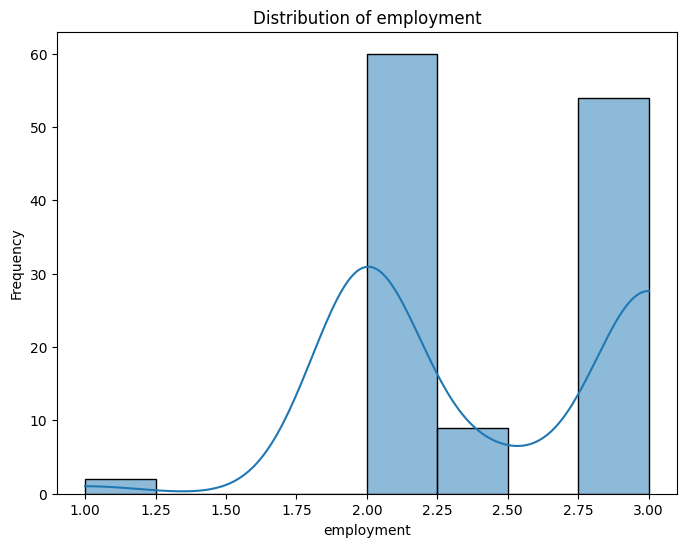

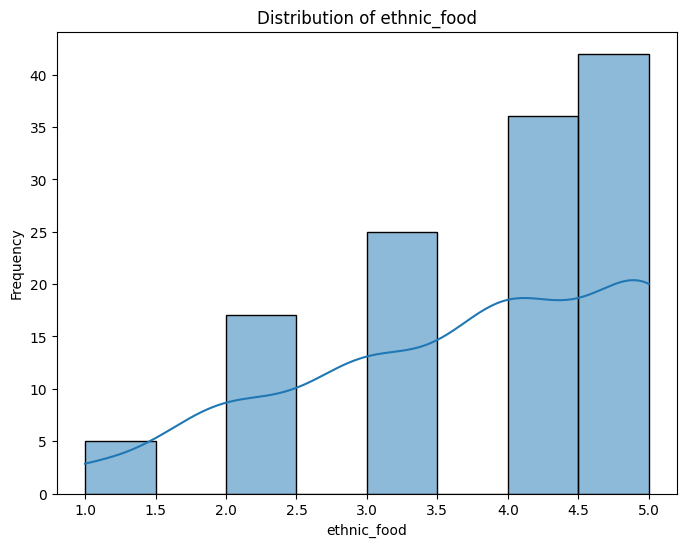

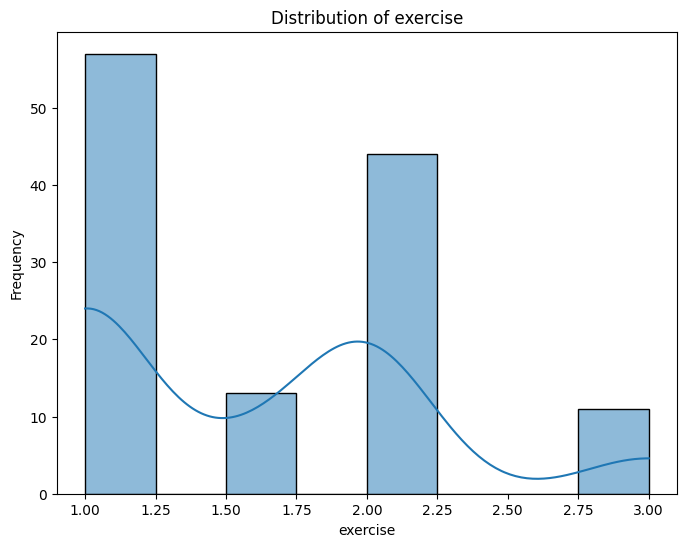

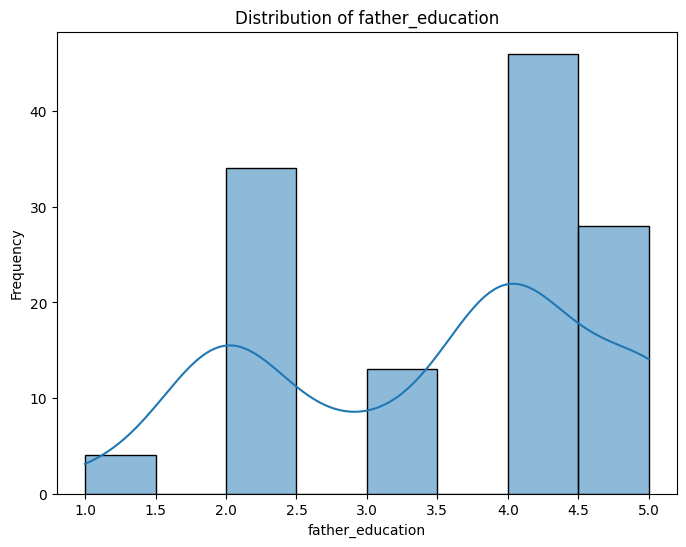

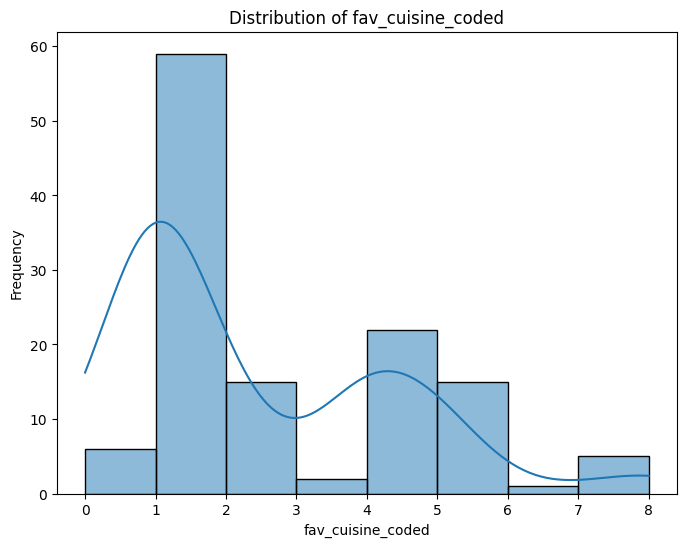

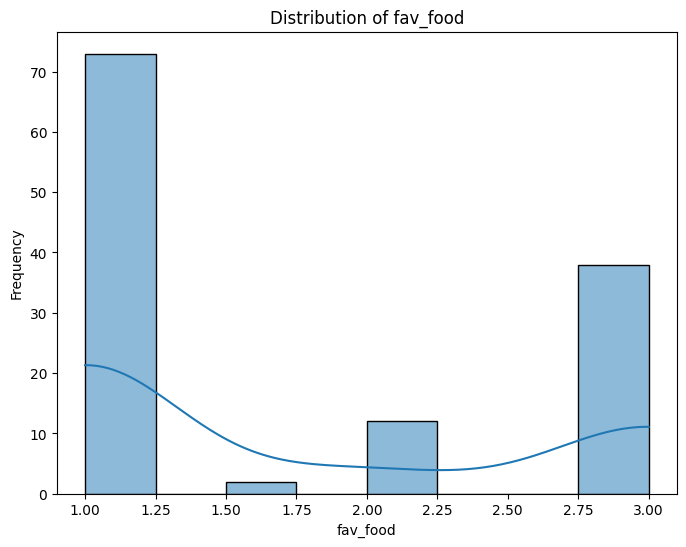

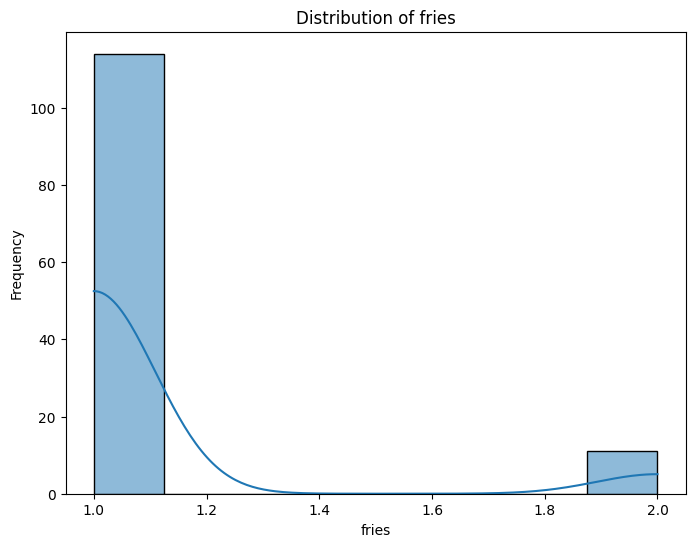

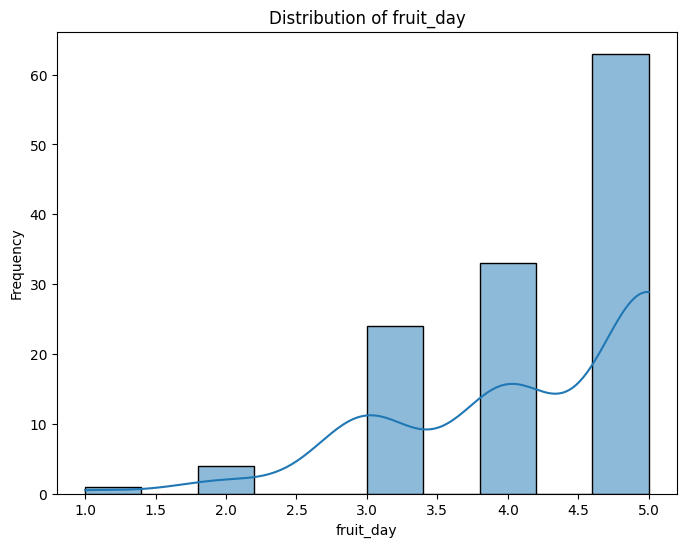

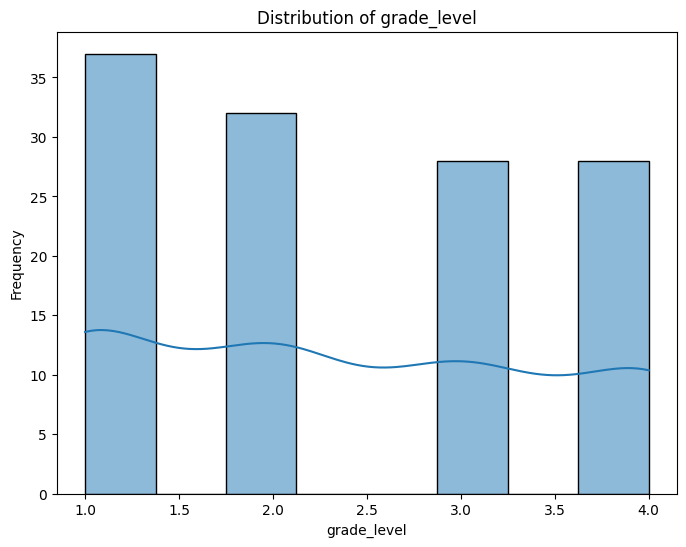

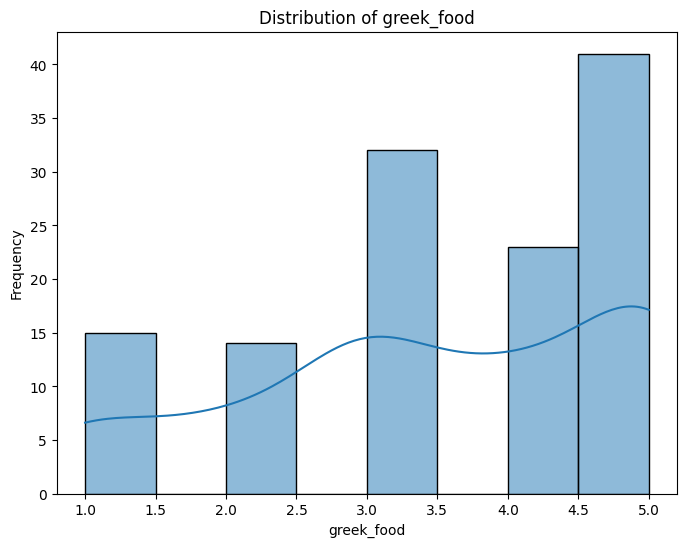

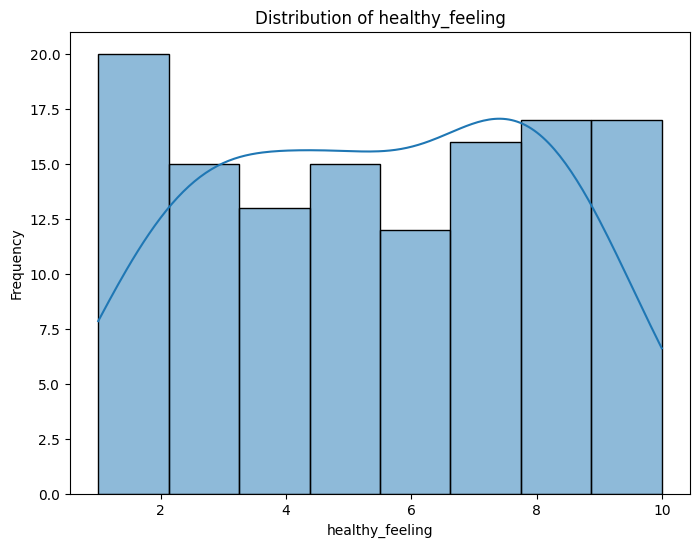

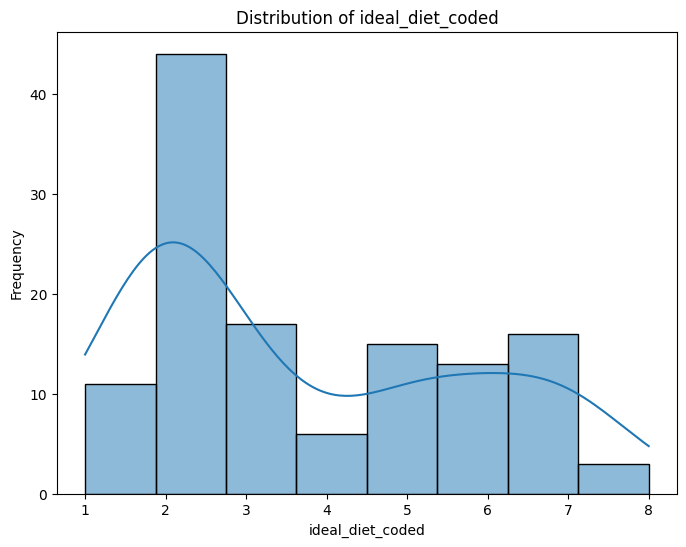

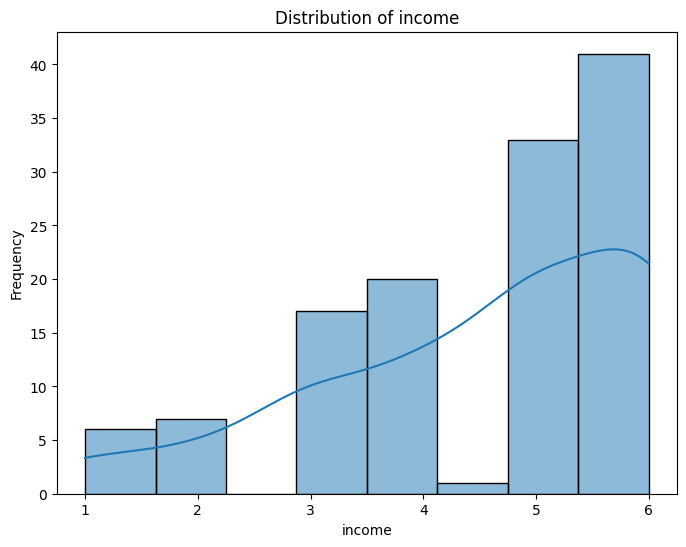

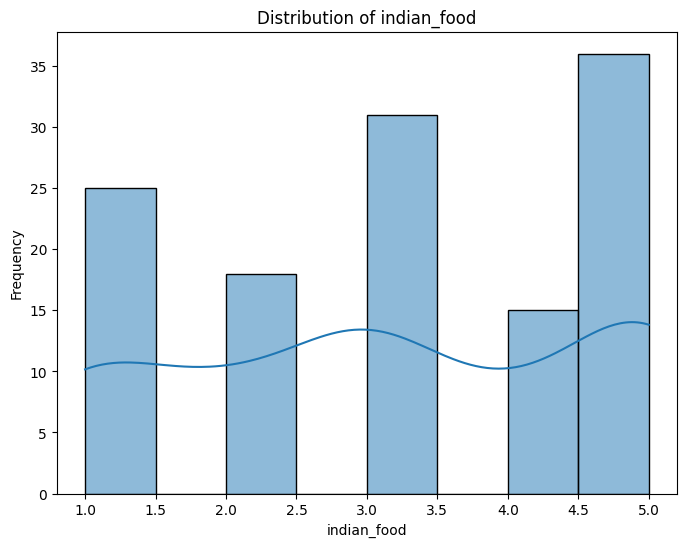

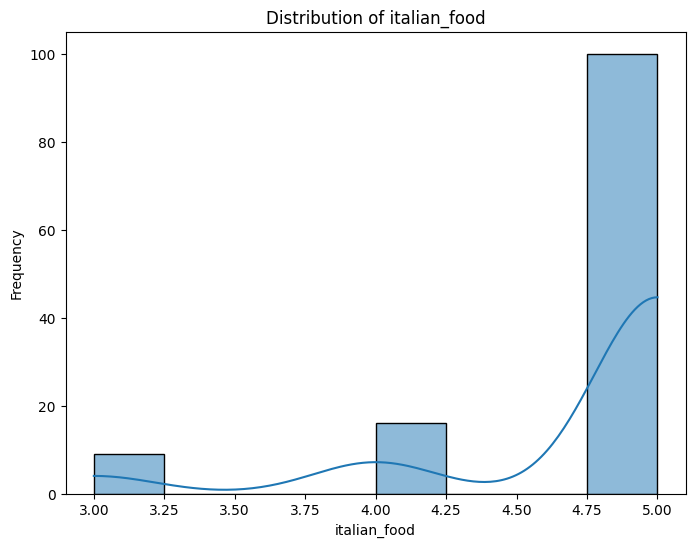

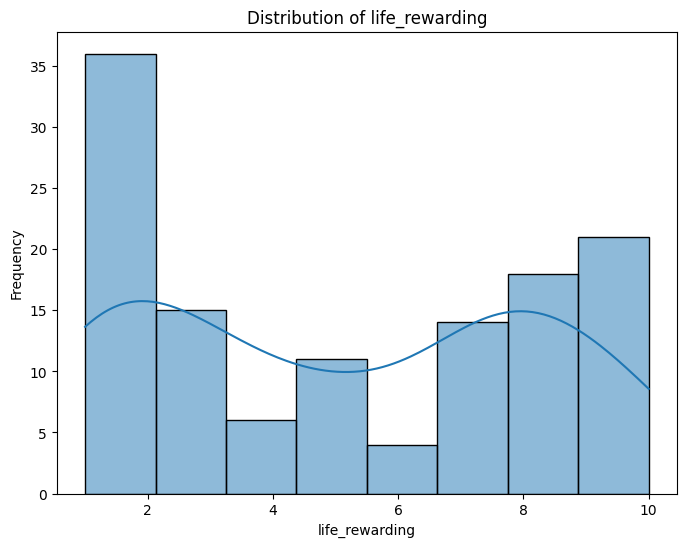

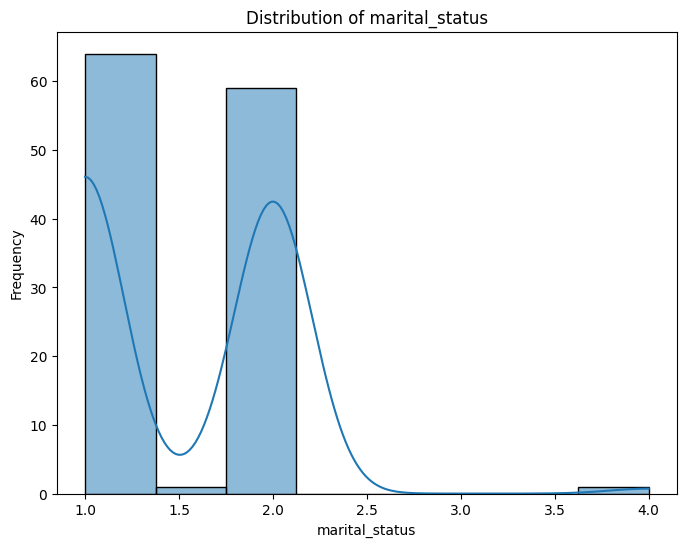

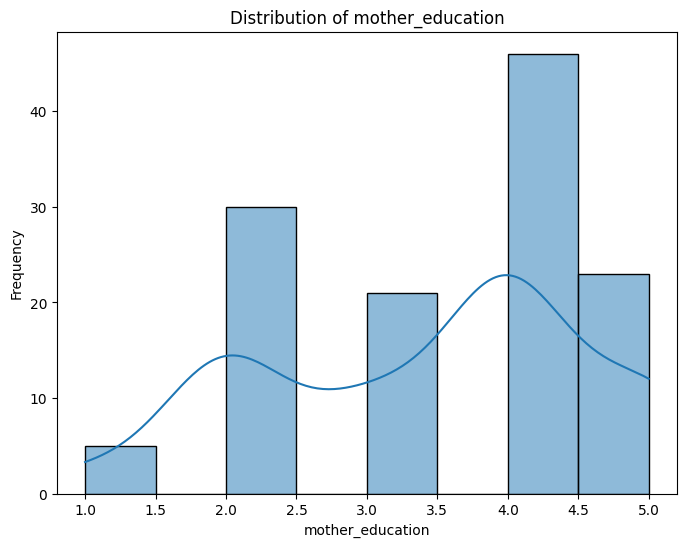

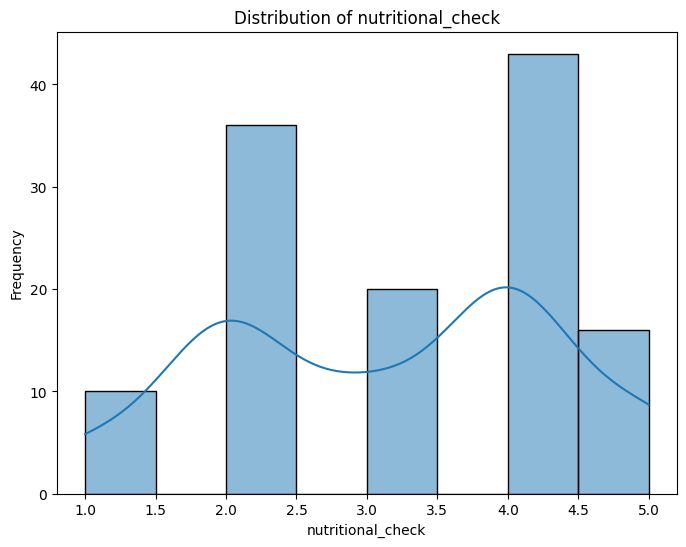

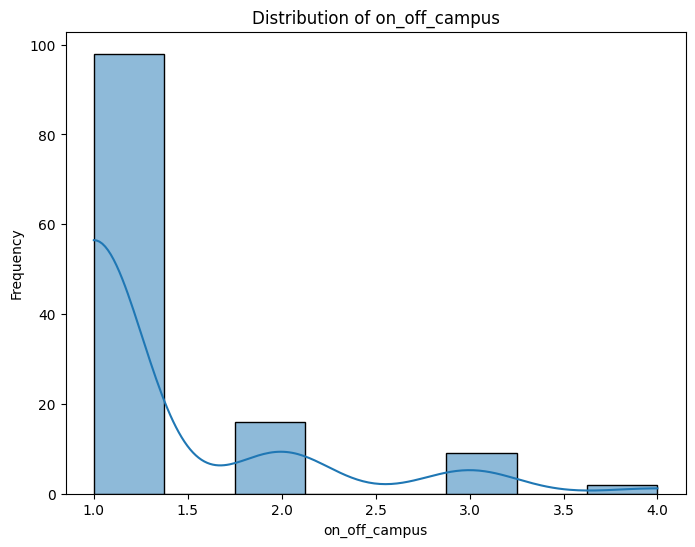

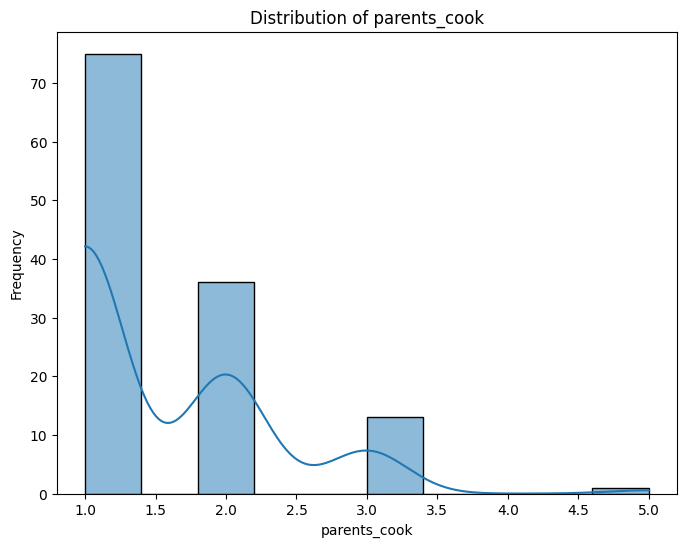

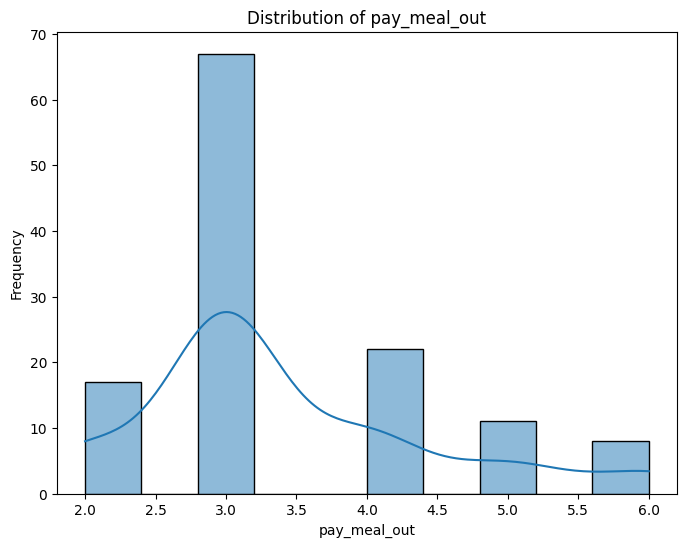

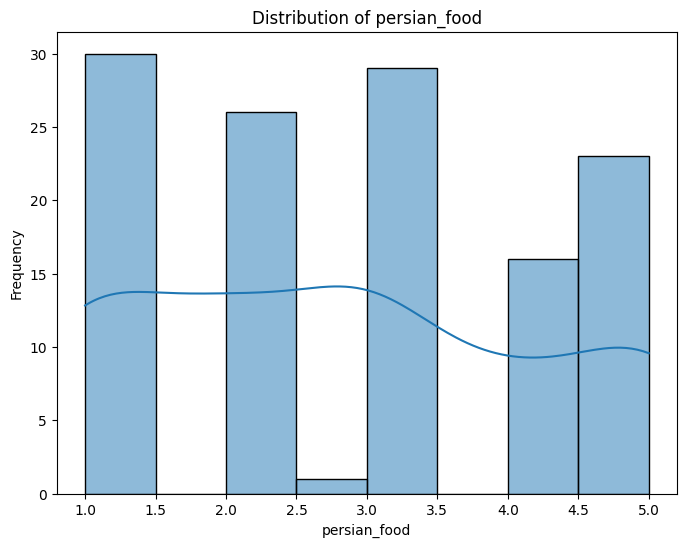

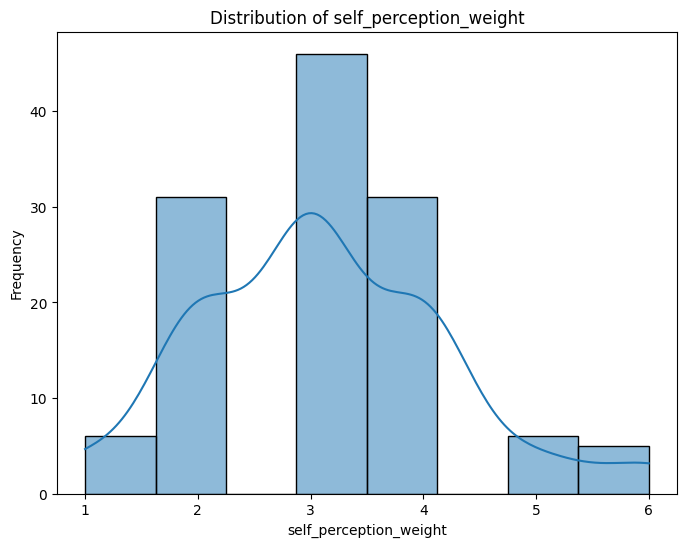

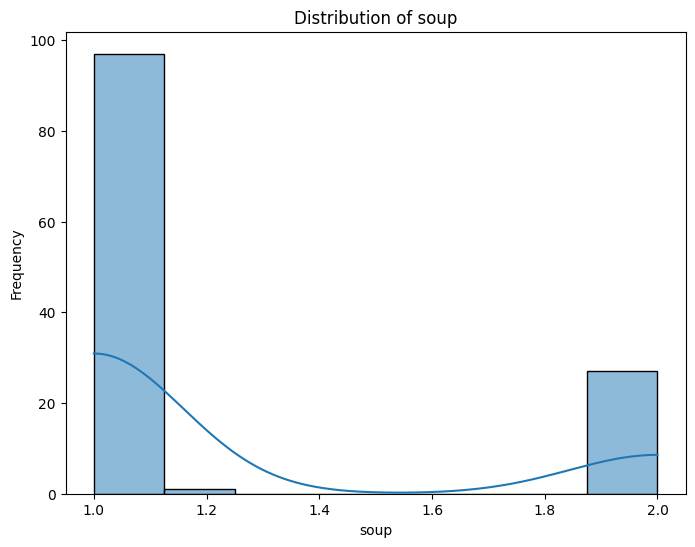

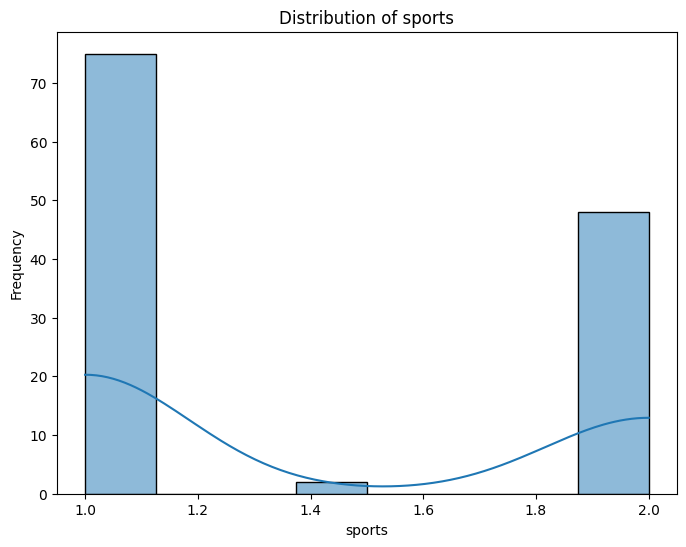

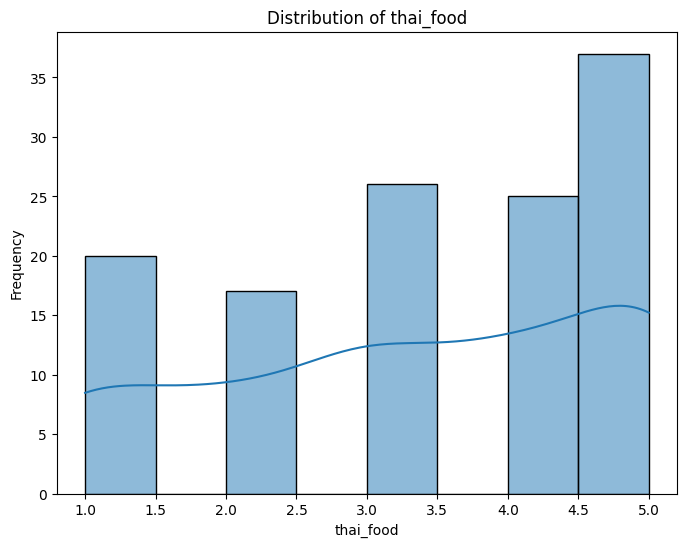

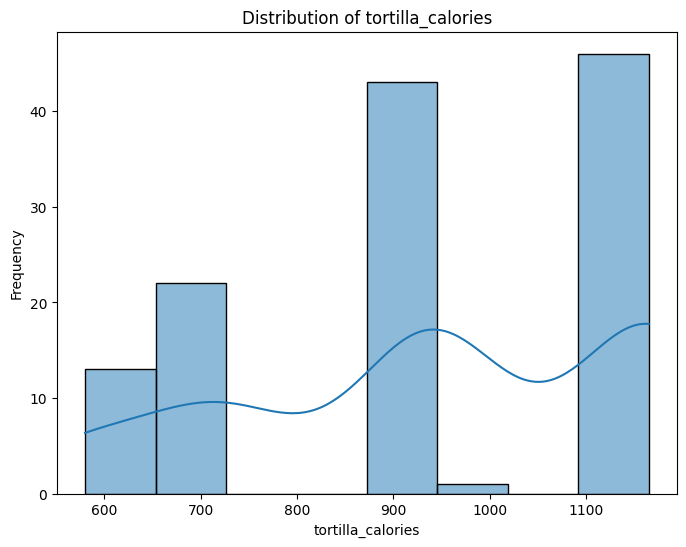

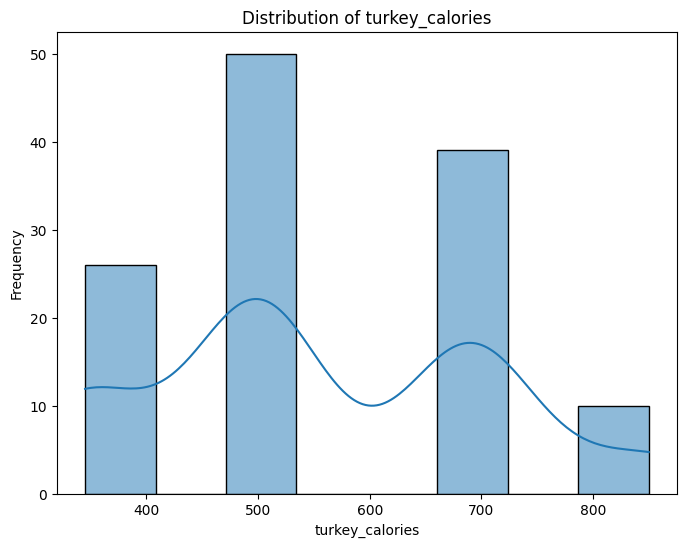

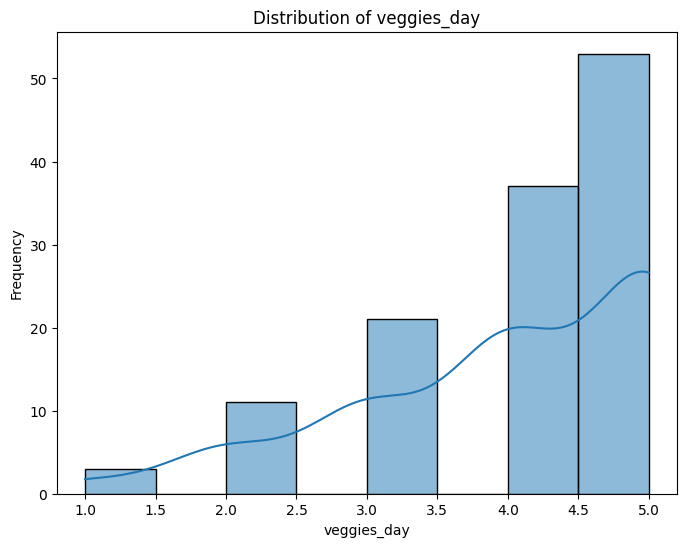

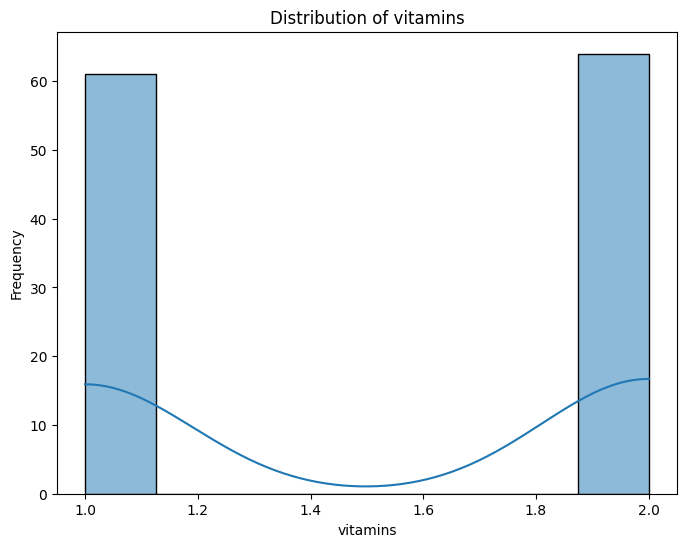

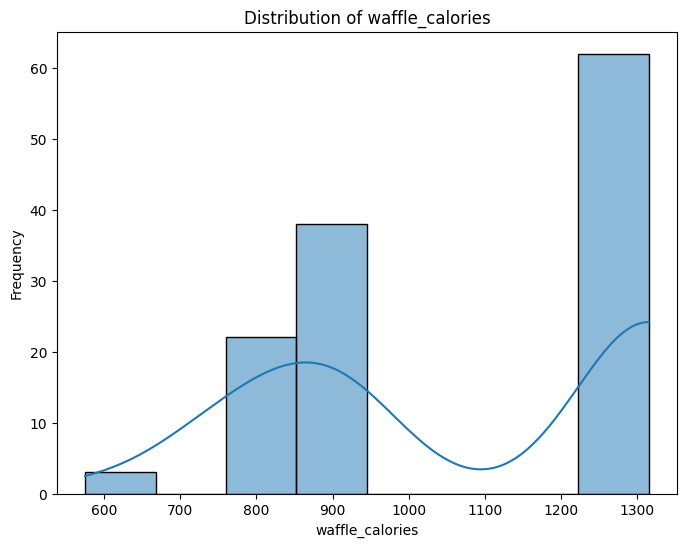

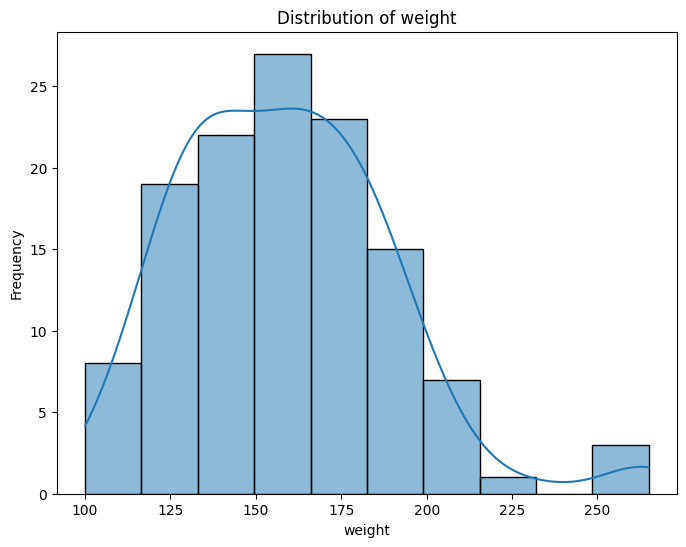

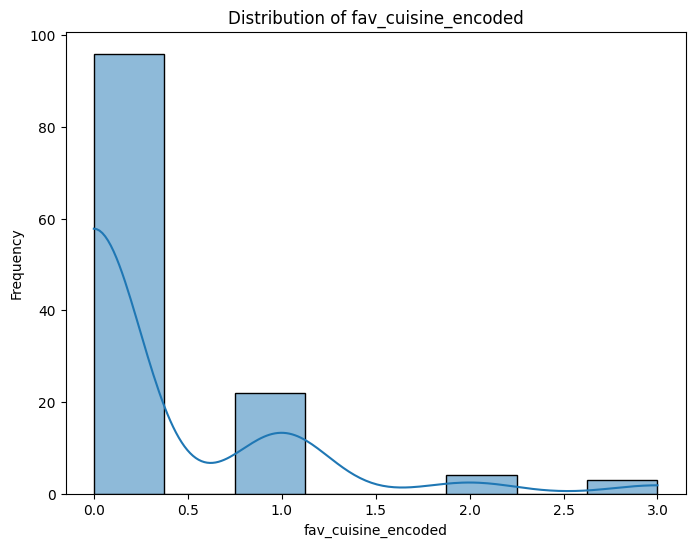

In [27]:
# Distribution of numeric features
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(cleaned_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()




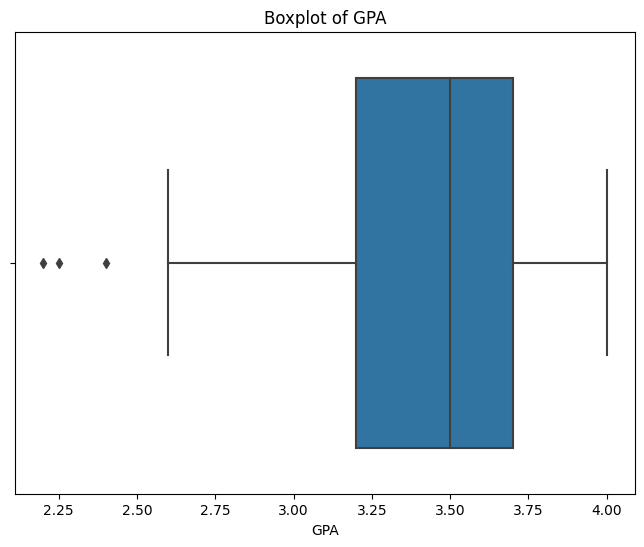

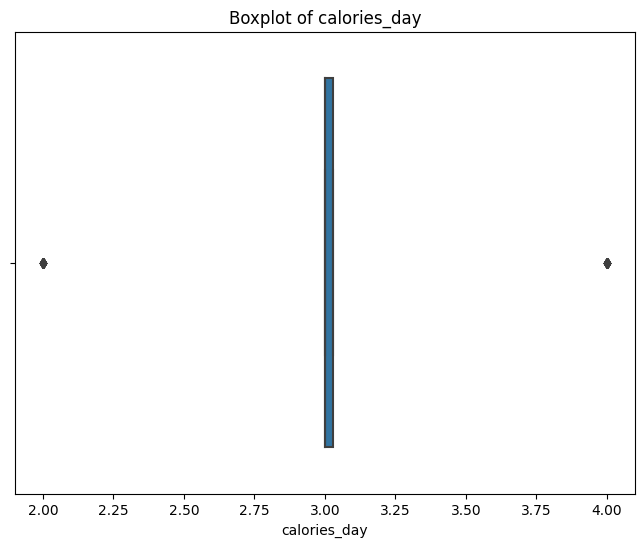

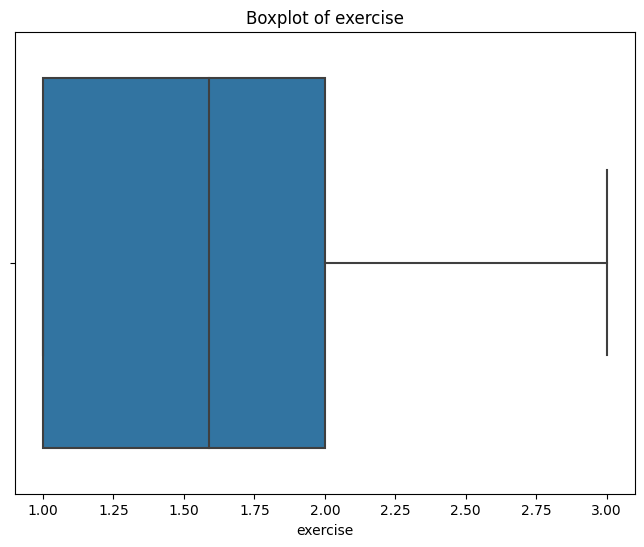

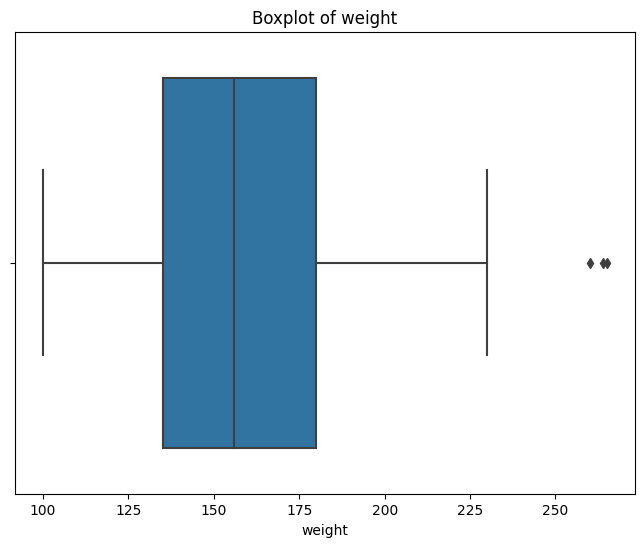

In [28]:
# Boxplot for selected features
selected_features = ['GPA', 'calories_day', 'exercise', 'weight']
for col in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cleaned_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()



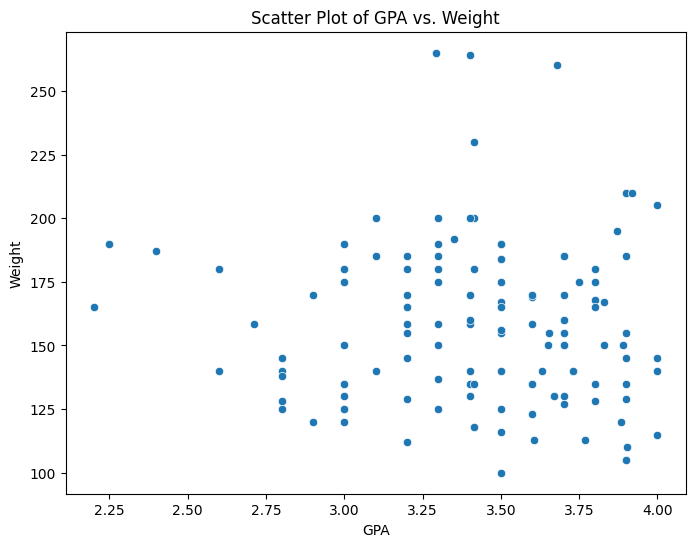

In [29]:
# Scatter plot of GPA vs. weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='weight', data=cleaned_df)
plt.title('Scatter Plot of GPA vs. Weight')
plt.xlabel('GPA')
plt.ylabel('Weight')
plt.show()



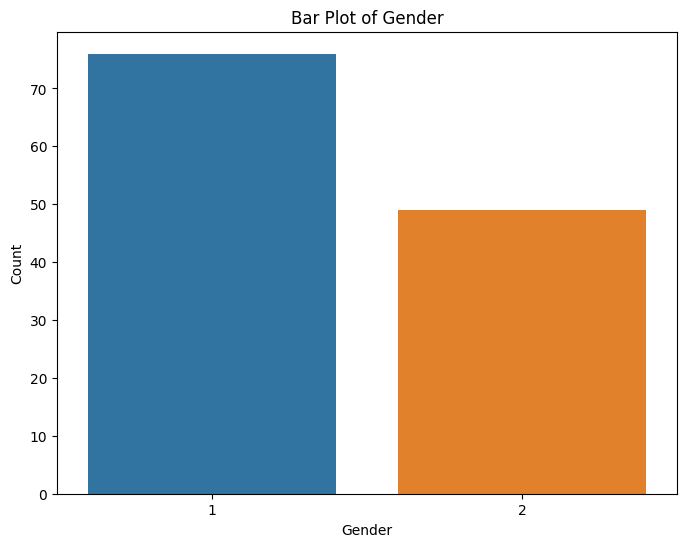

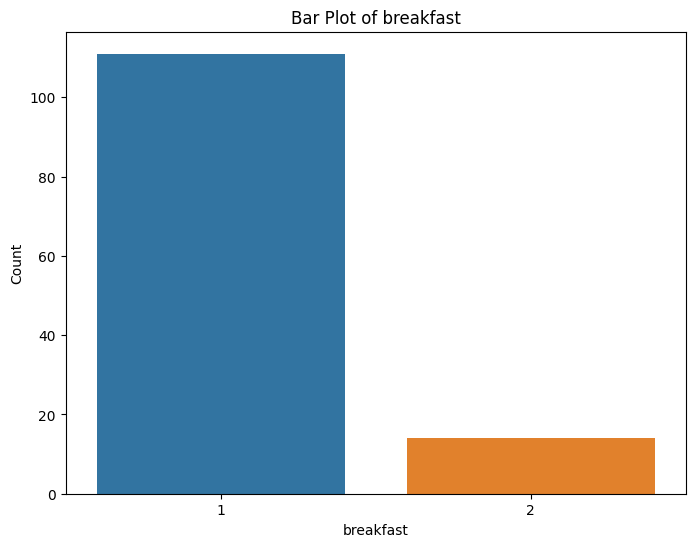

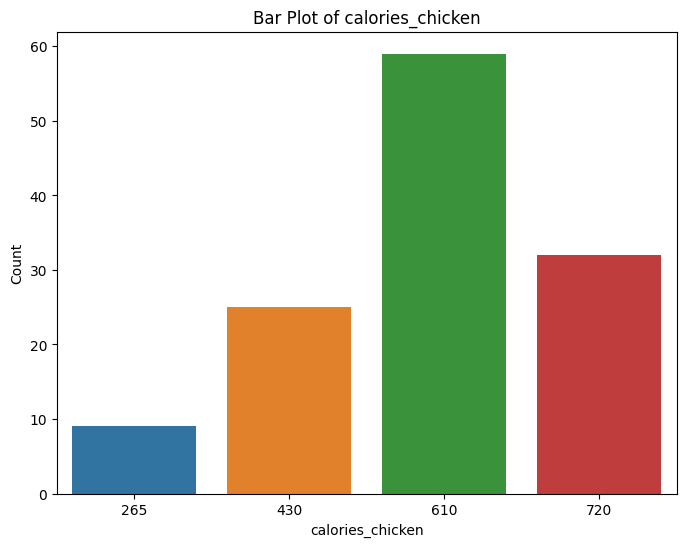

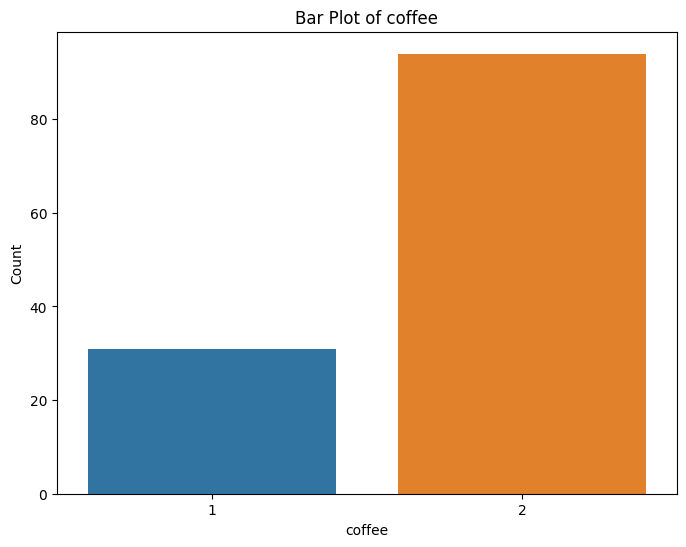

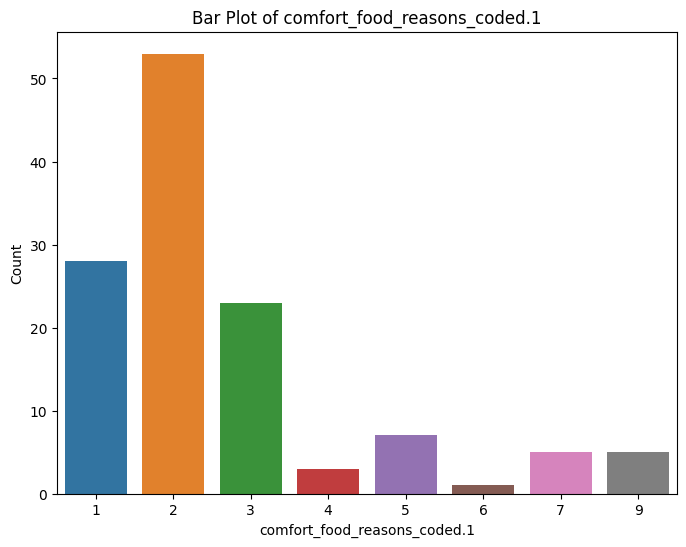

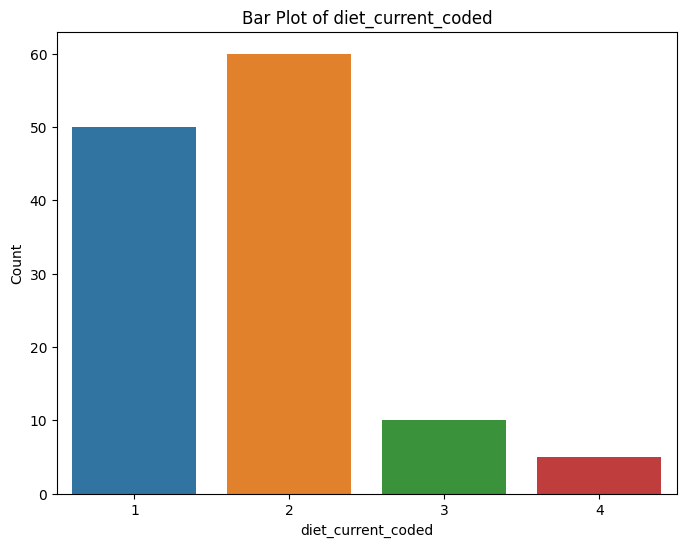

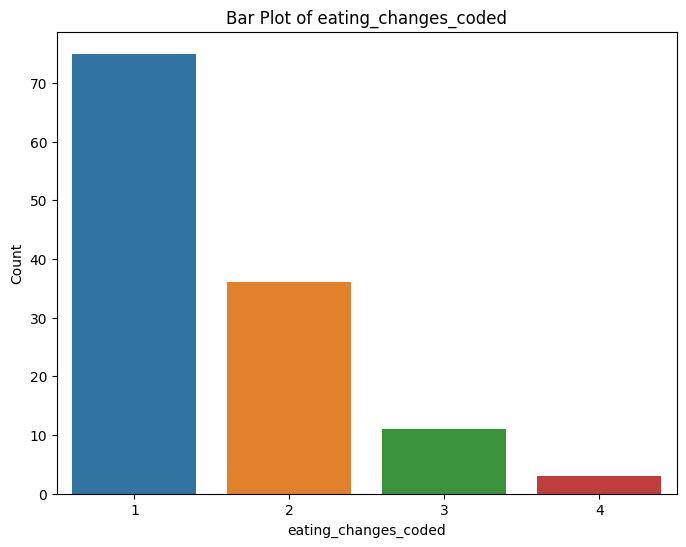

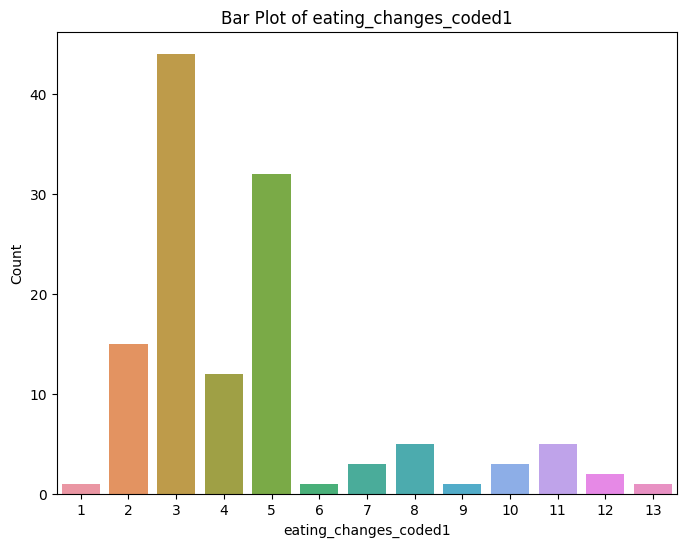

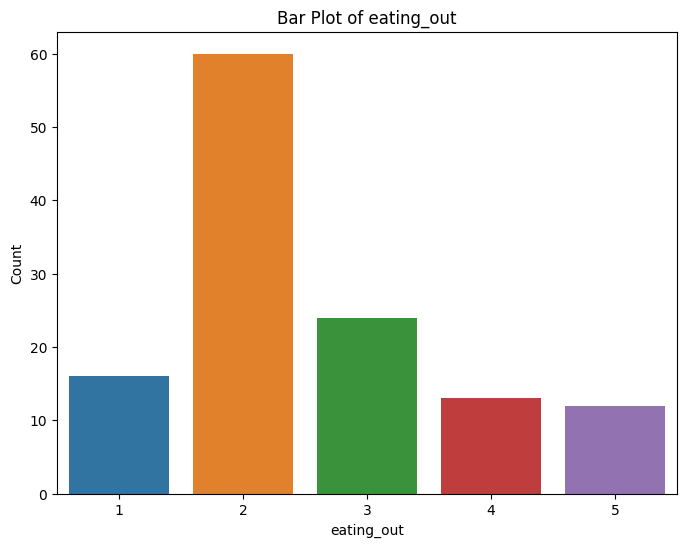

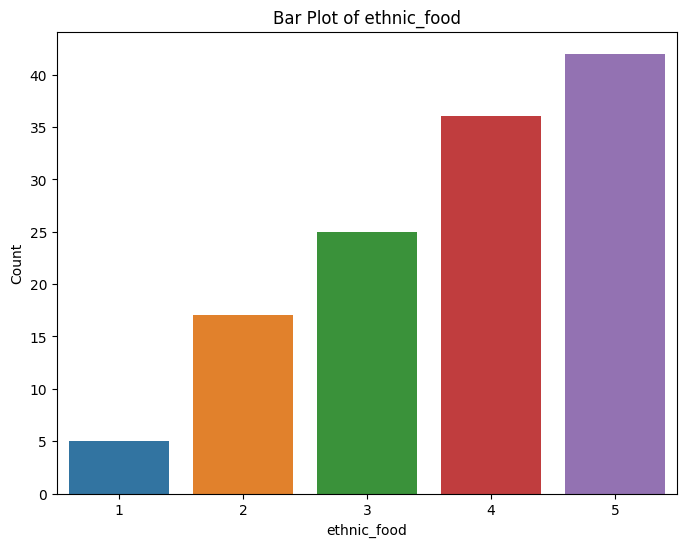

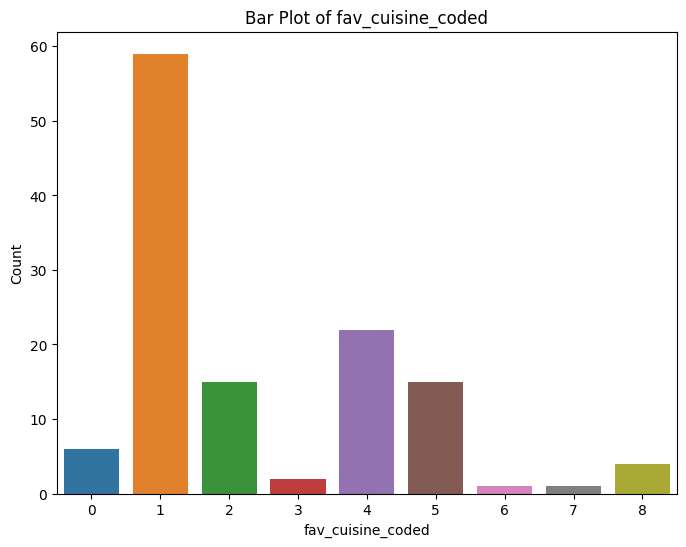

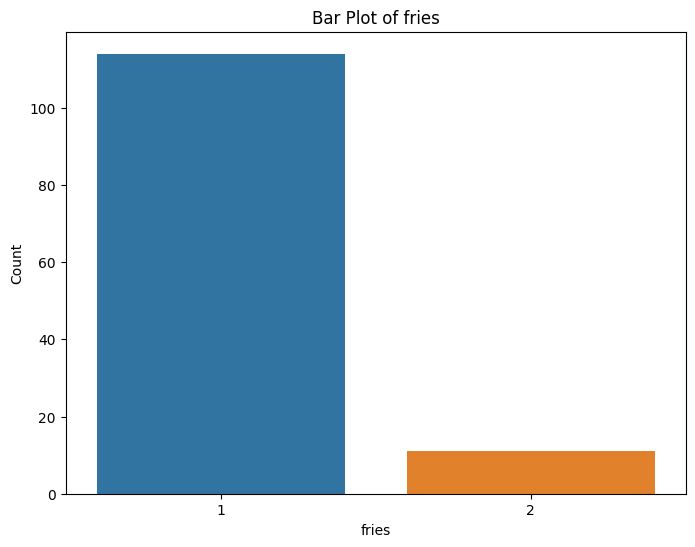

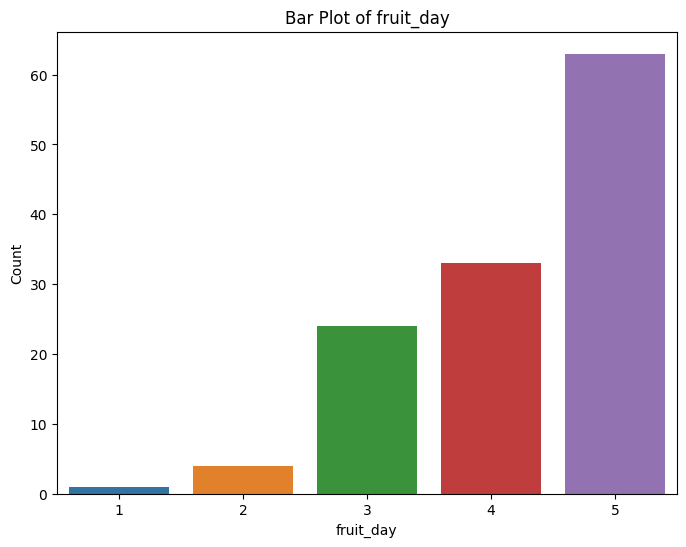

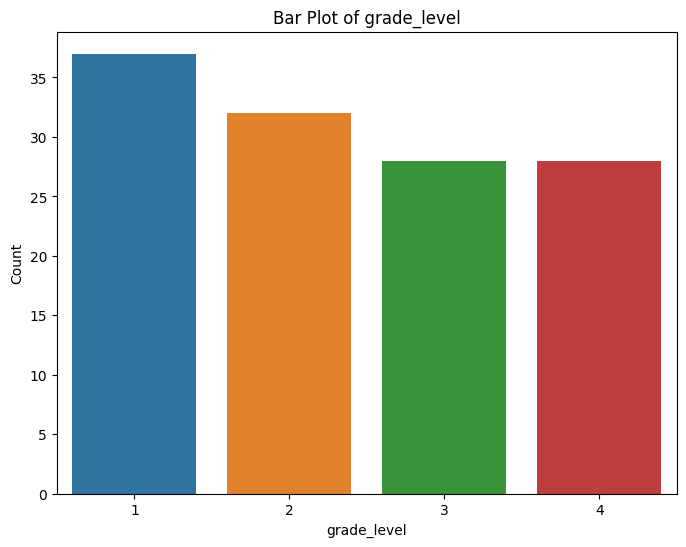

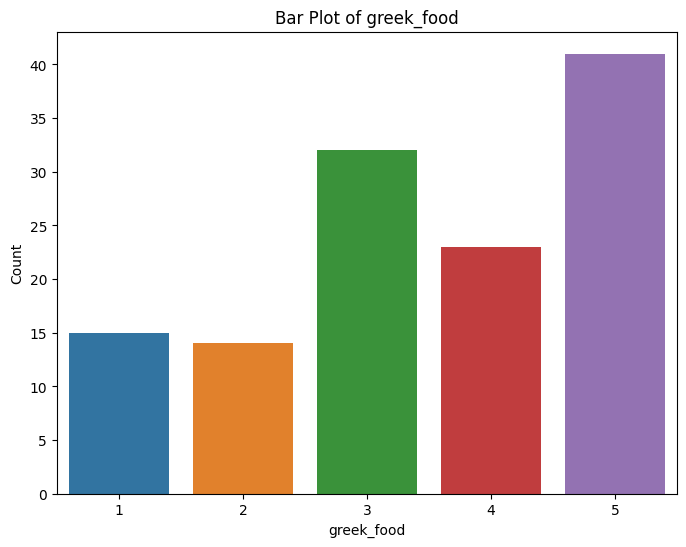

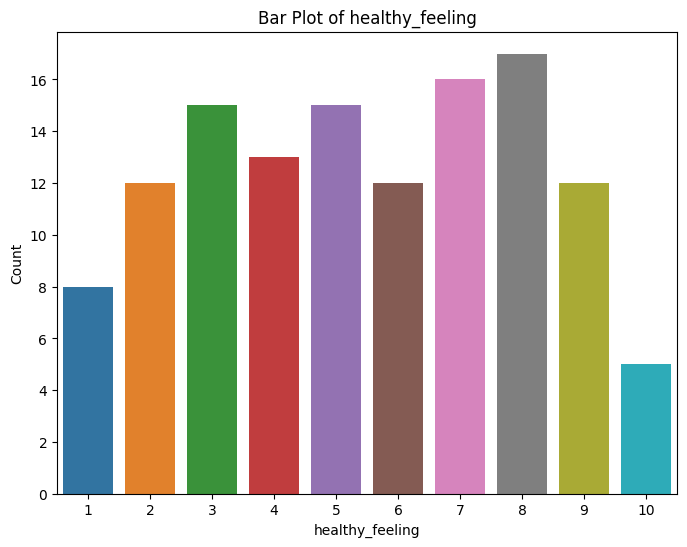

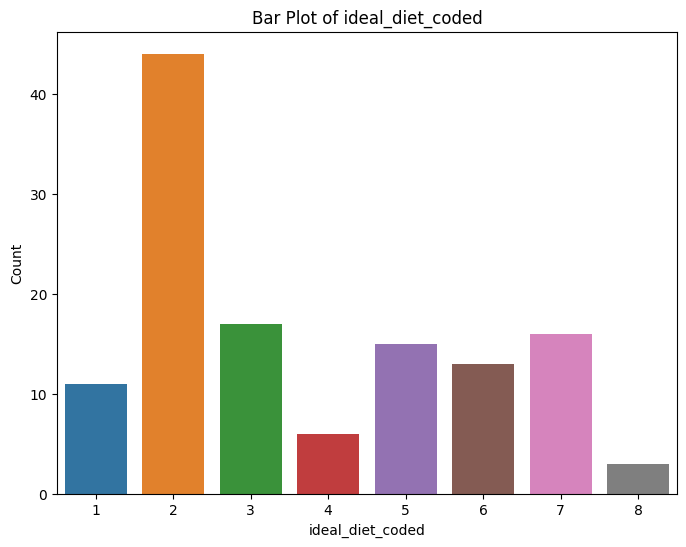

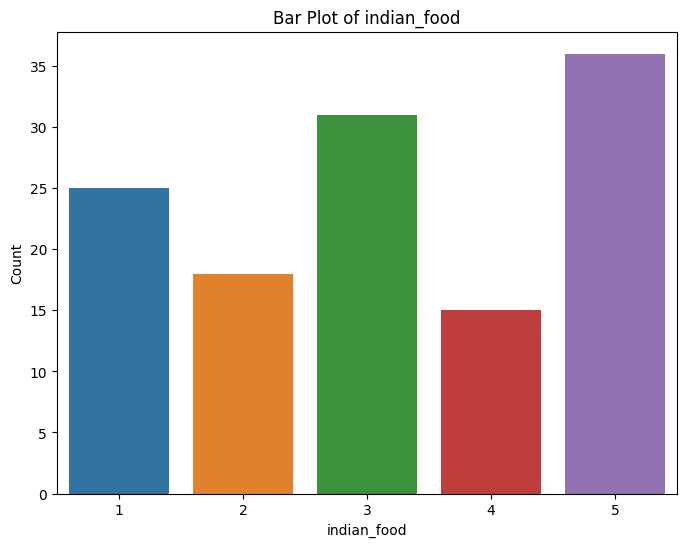

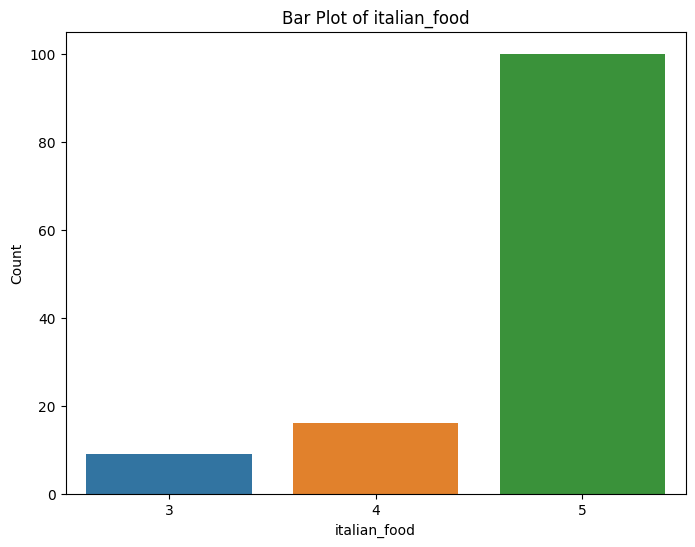

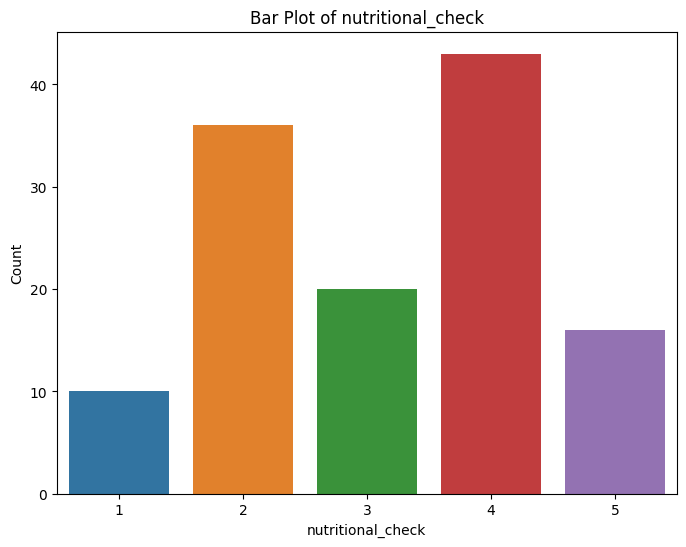

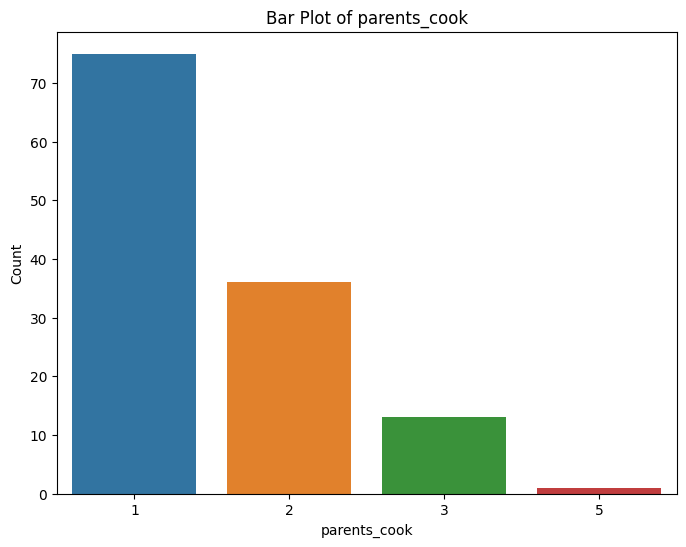

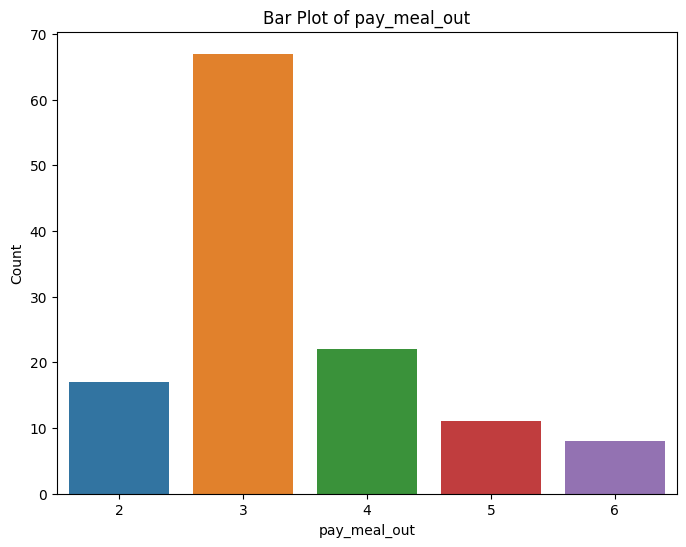

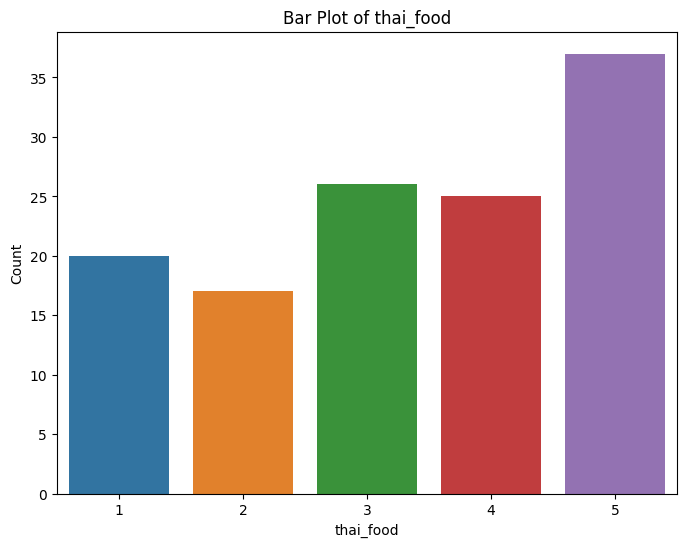

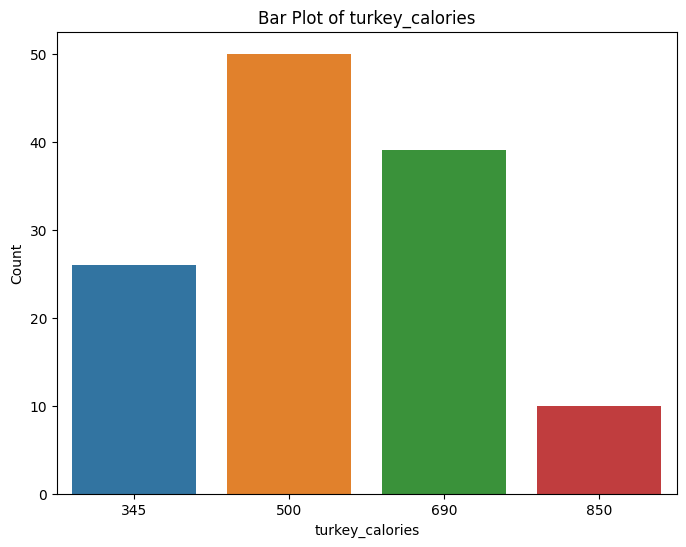

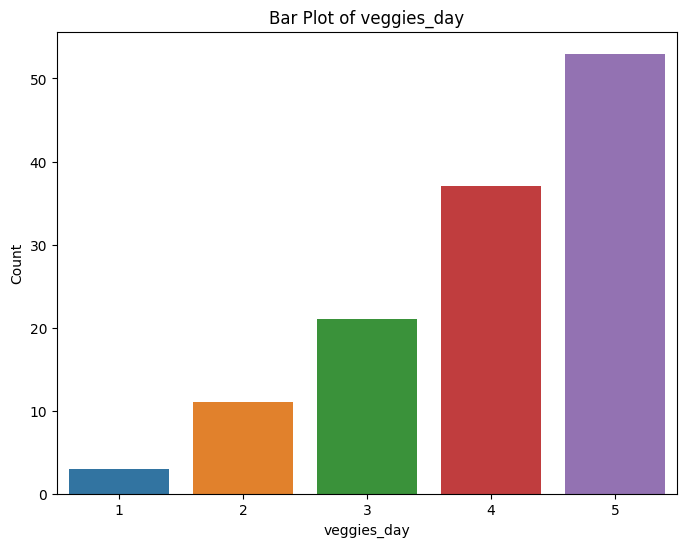

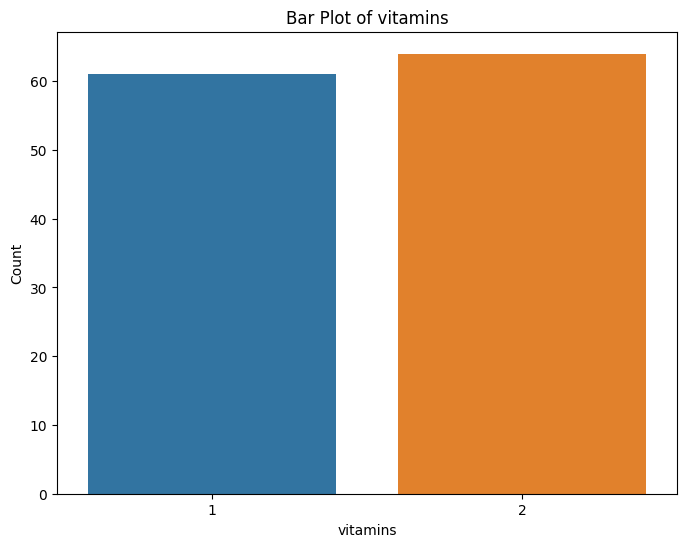

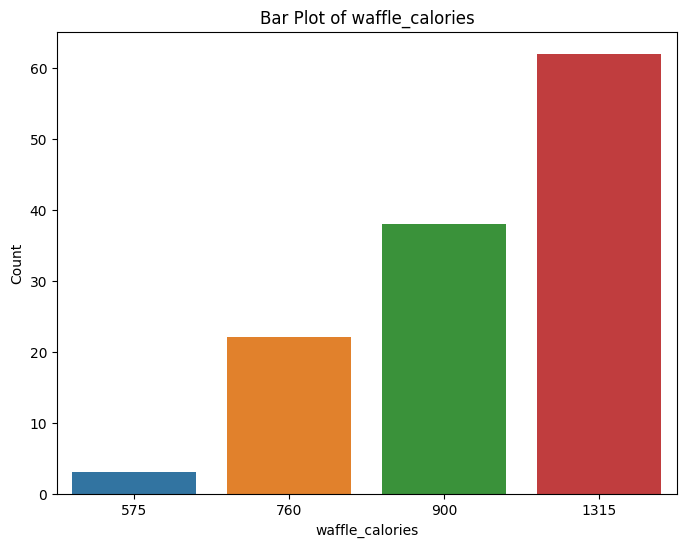

In [30]:
# Bar plot for categorical features
categorical_cols = cleaned_df.select_dtypes(include='int64').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=cleaned_df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

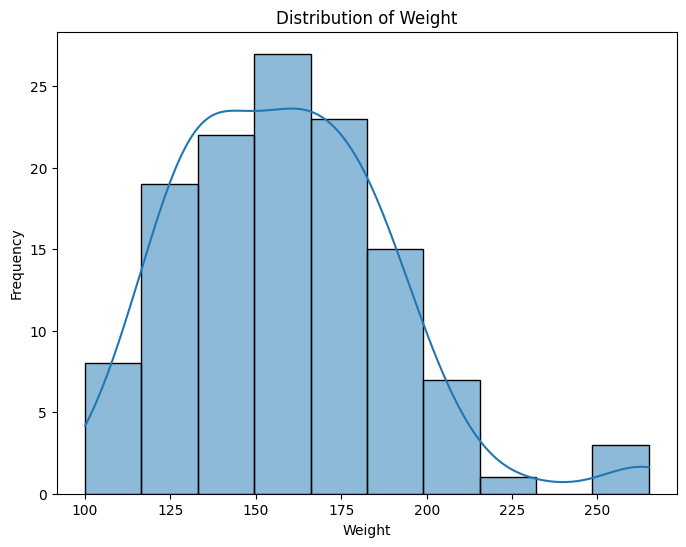

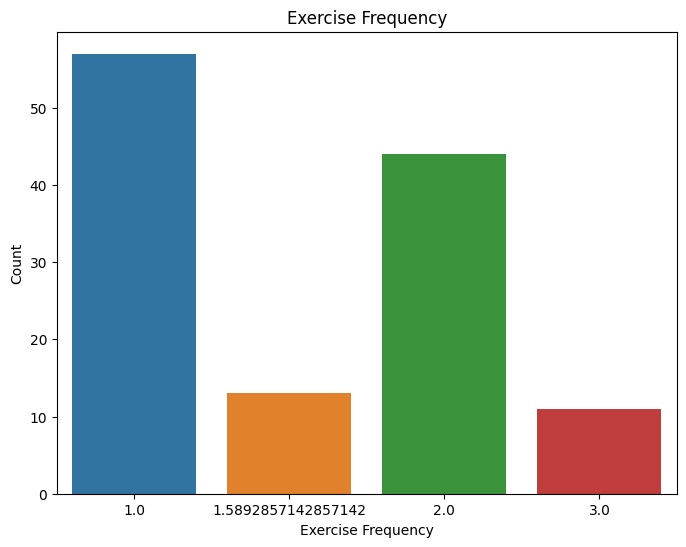

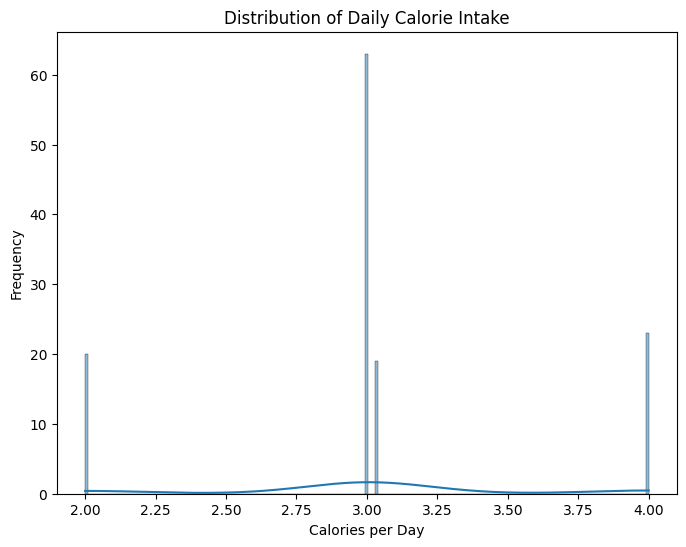

In [31]:
# Weight Analysis
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Exercise Habits Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='exercise', data=cleaned_df)
plt.title('Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.show()

# Daily Calorie Intake Analysis
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_df['calories_day'], kde=True)
plt.title('Distribution of Daily Calorie Intake')
plt.xlabel('Calories per Day')
plt.ylabel('Frequency')
plt.show()


<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">if you like my notebook give upvote , it will encourage me thanks for exploring my notebook.</h1>
</div>